#Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#Data Description :
Undergrad : person is under
graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

In [3]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [6]:
fraud = pd.read_csv("Fraud_check.csv")

In [7]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
fraud.shape

(600, 6)

In [9]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [11]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [19]:
fraud=fraud.rename(columns={"Marital.Status":"marital_status","Taxable.Income":"taxable_income","City.Population":"city_population","Work.Experience":"work_experience"})

In [21]:
fraud.head()

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [20]:
fraud.columns

Index(['Undergrad', 'marital_status', 'taxable_income', 'city_population',
       'work_experience', 'Urban'],
      dtype='object')

In [22]:
fraud['marital_status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [23]:
fraud['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [24]:
fraud1= fraud.copy()
list=[]
for i in range(0, len(fraud)):
  if fraud["taxable_income"][i]<=30000:
    list.append("Risky")
  elif fraud["taxable_income"][i]>30000:
    list.append("Good")
fraud1["loan_type"]=list
fraud1

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,loan_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [25]:
fraud1['loan_type'].unique()

array(['Good', 'Risky'], dtype=object)

In [26]:
fraud1.value_counts("loan_type")

loan_type
Good     476
Risky    124
dtype: int64

<Axes: xlabel='loan_type', ylabel='count'>

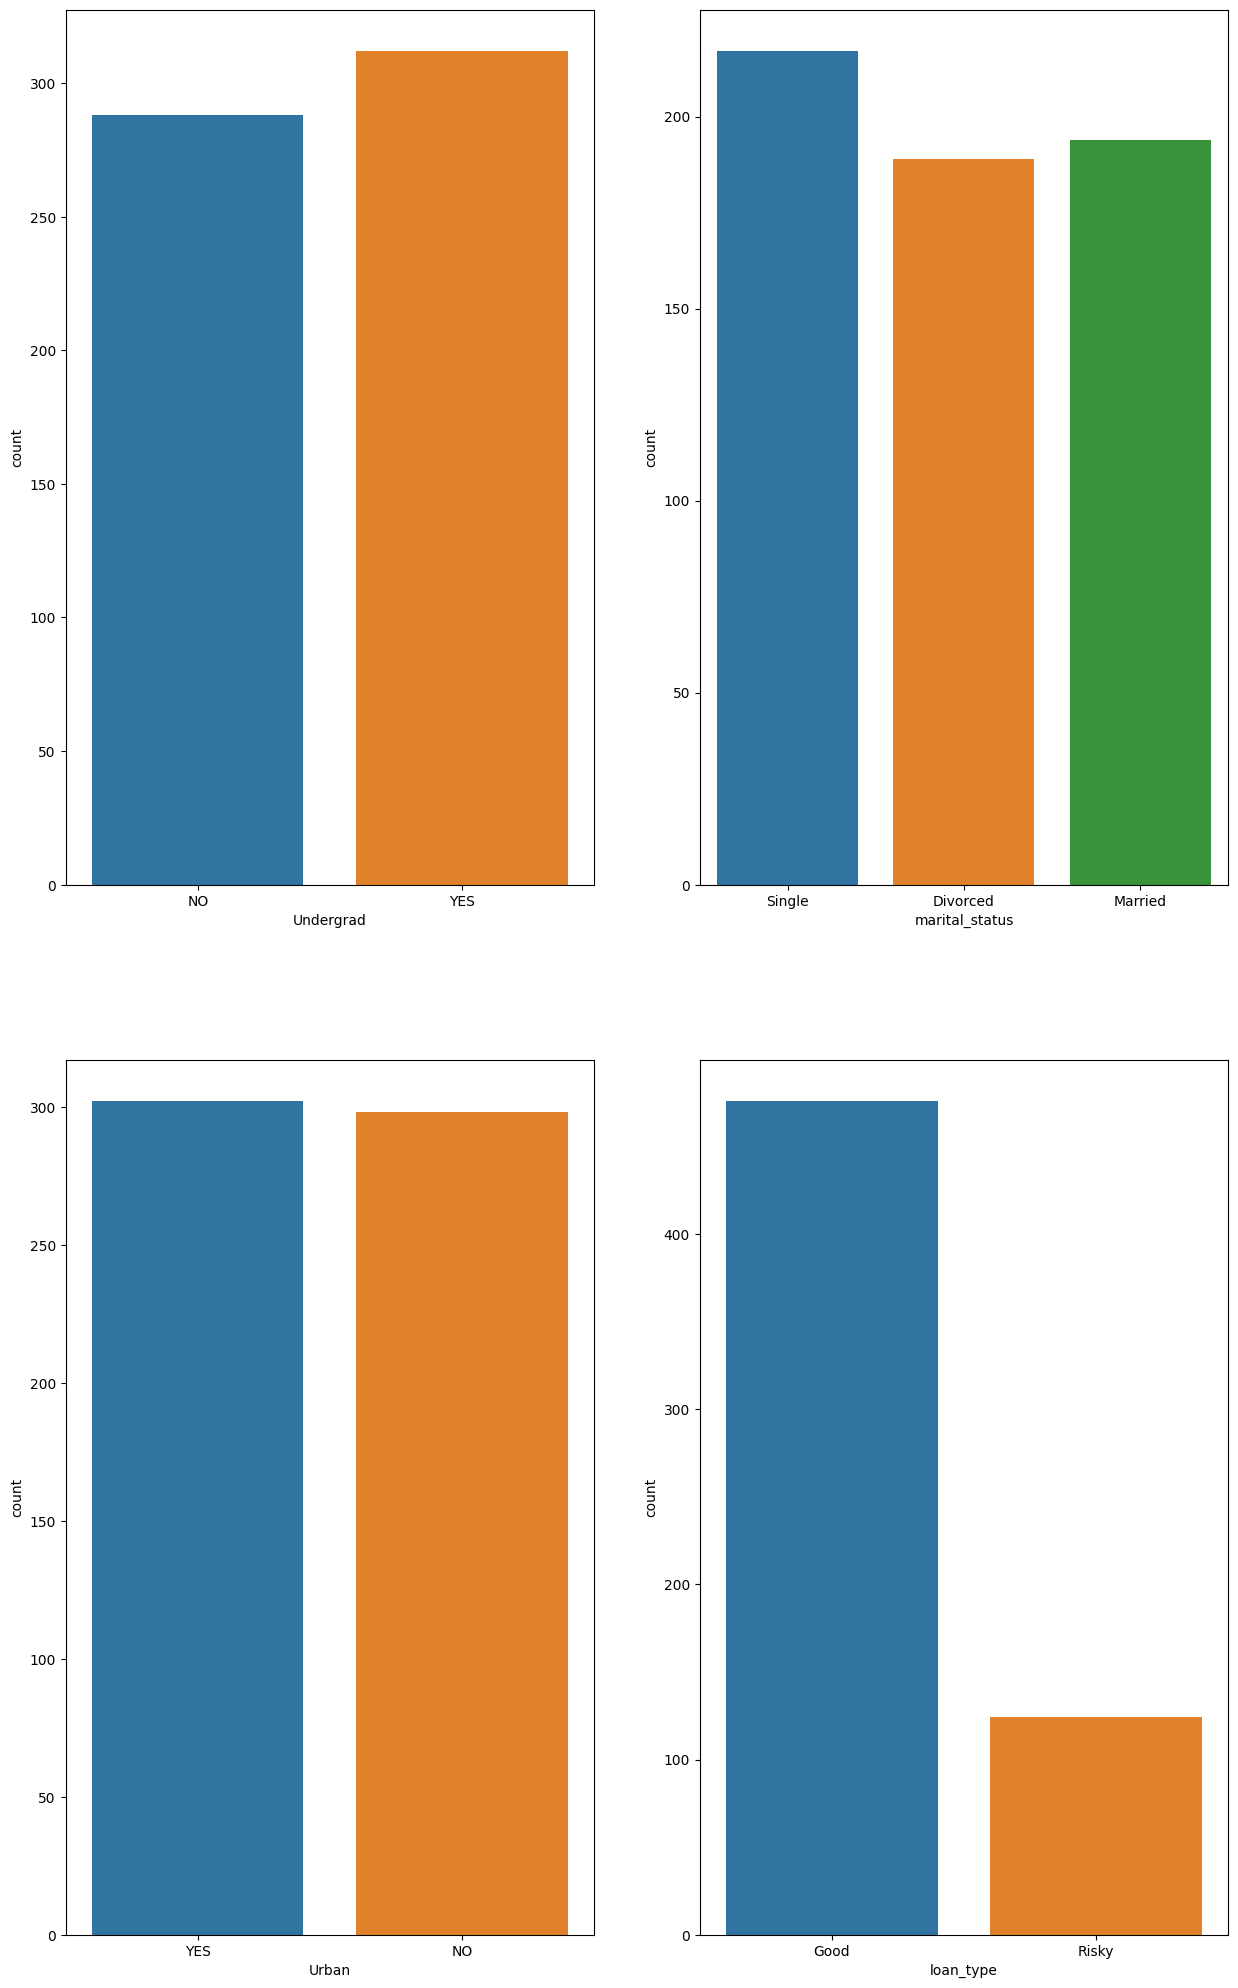

In [28]:
fig, ax=plt.subplots(2,2,figsize=(15,25))

sns.countplot(x="Undergrad",data=fraud1, ax=ax[0,0])
sns.countplot(x="marital_status",data=fraud1, ax=ax[0,1])
sns.countplot(x="Urban", data=fraud1, ax=ax[1,0])
sns.countplot(x="loan_type",data=fraud1, ax=ax[1,1])

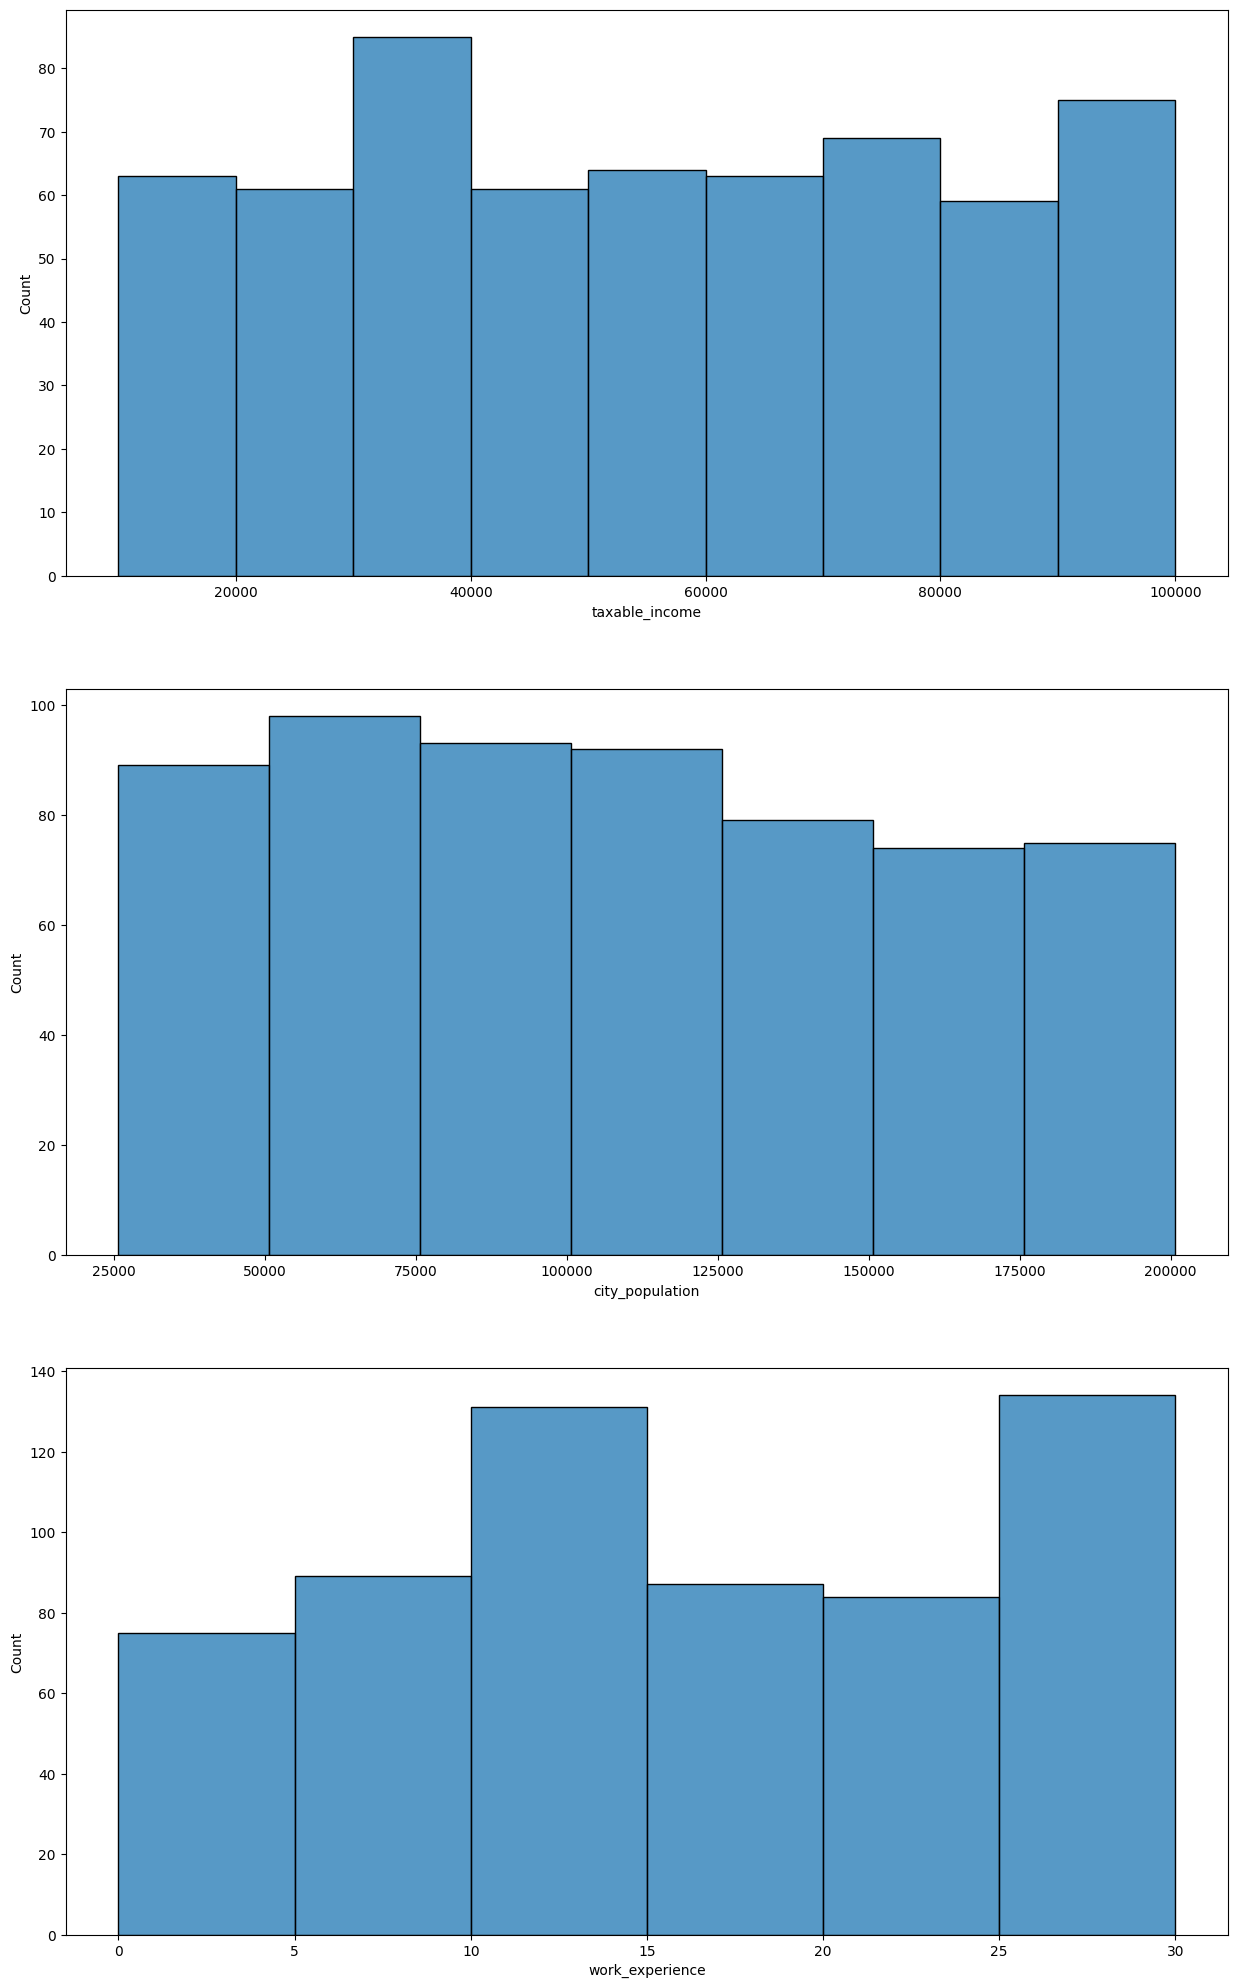

In [29]:
fig,ax=plt.subplots(3,1,figsize=(15,25))

sns.histplot(x="taxable_income",data=fraud1,ax=ax[0],bins=range(min(fraud1['taxable_income']), max(fraud1['taxable_income']) + 10000, 10000))
sns.histplot(x="city_population",data=fraud1,ax=ax[1],bins=range(min(fraud1['city_population']), max(fraud1['city_population']) + 25000, 25000))
sns.histplot(x="work_experience",data=fraud1,ax=ax[2],bins=range(min(fraud1['work_experience']), max(fraud1['work_experience']) + 5, 5))
plt.show()


<Axes: >

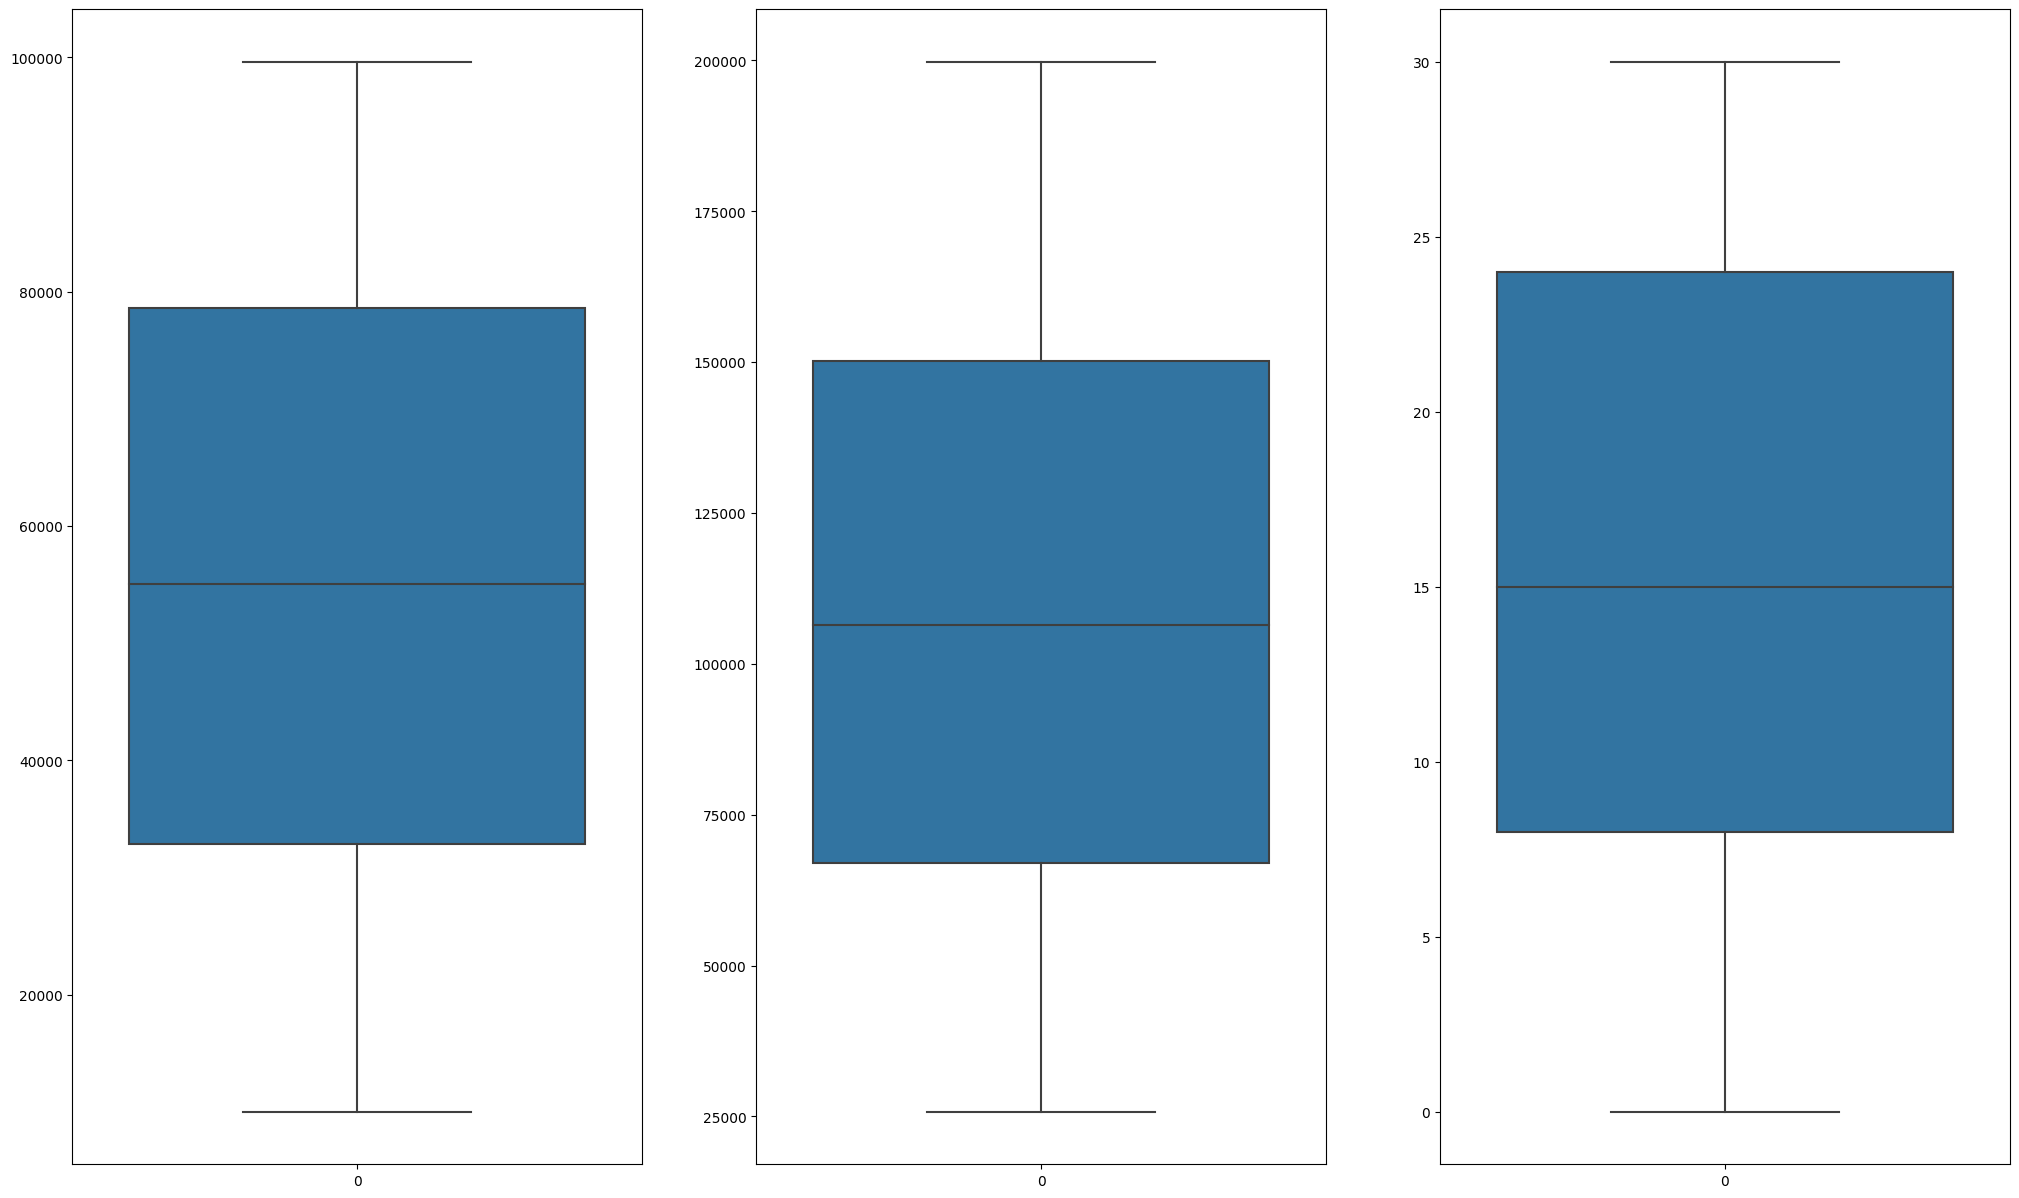

In [30]:
plt.figure(figsize=(25,15))
plt.subplot(1,3,1)
sns.boxplot(fraud["taxable_income"])

plt.subplot(1,3,2)
sns.boxplot(fraud["city_population"])

plt.subplot(1,3,3)
sns.boxplot(fraud["work_experience"])

Univarient analysis

In [32]:
loan_asset_risky = pd.DataFrame()
loan_asset_good= pd.DataFrame()

loan_asset_risky = fraud1.loc[fraud1['loan_type']=='Risky']

loan_asset_good = fraud1.loc[fraud1['loan_type']=='Good']

In [33]:
loan_asset_risky

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,loan_type
10,NO,Single,29732,102602,19,YES,Risky
12,NO,Divorced,11794,148033,14,YES,Risky
16,YES,Divorced,24987,34551,29,NO,Risky
19,NO,Single,10987,126953,30,YES,Risky
21,YES,Divorced,14310,29106,7,YES,Risky
...,...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES,Risky
557,YES,Married,12810,157421,10,NO,Risky
567,YES,Single,16316,129912,30,NO,Risky
575,NO,Divorced,10735,95975,13,YES,Risky


Taxable income w.r.t to fraud

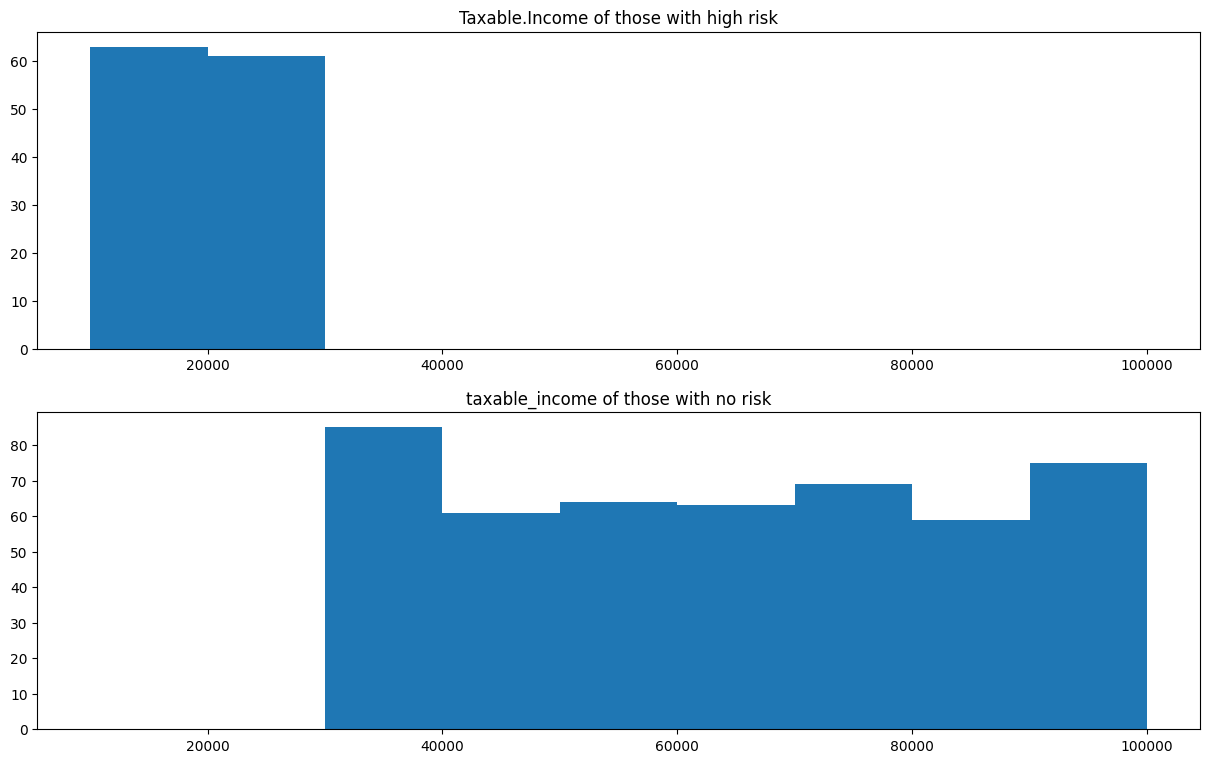

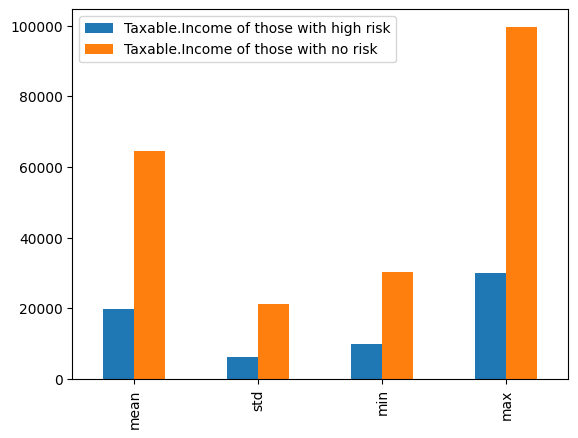

In [34]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['taxable_income'], bins=range(min(fraud1['taxable_income']), max(fraud1['taxable_income']) + 10000, 10000))
plt.title('Taxable.Income of those with high risk')

plt.subplot(3,1,2)
plt.hist(loan_asset_good['taxable_income'],  bins=range(min(fraud1['taxable_income']), max(fraud1['taxable_income']) + 10000, 10000))
plt.title('taxable_income of those with no risk',)



income_describe = pd.DataFrame()

income_describe['Taxable.Income of those with high risk'] = loan_asset_risky['taxable_income'].describe()
income_describe['Taxable.Income of those with no risk'] = loan_asset_good['taxable_income'].describe()
income_describe  = income_describe.drop(['count', '25%', '50%', '75%'])

plt.subplot(3,1,2)
income_describe.plot.bar()

plt.show()

work experience w.r.t fraud

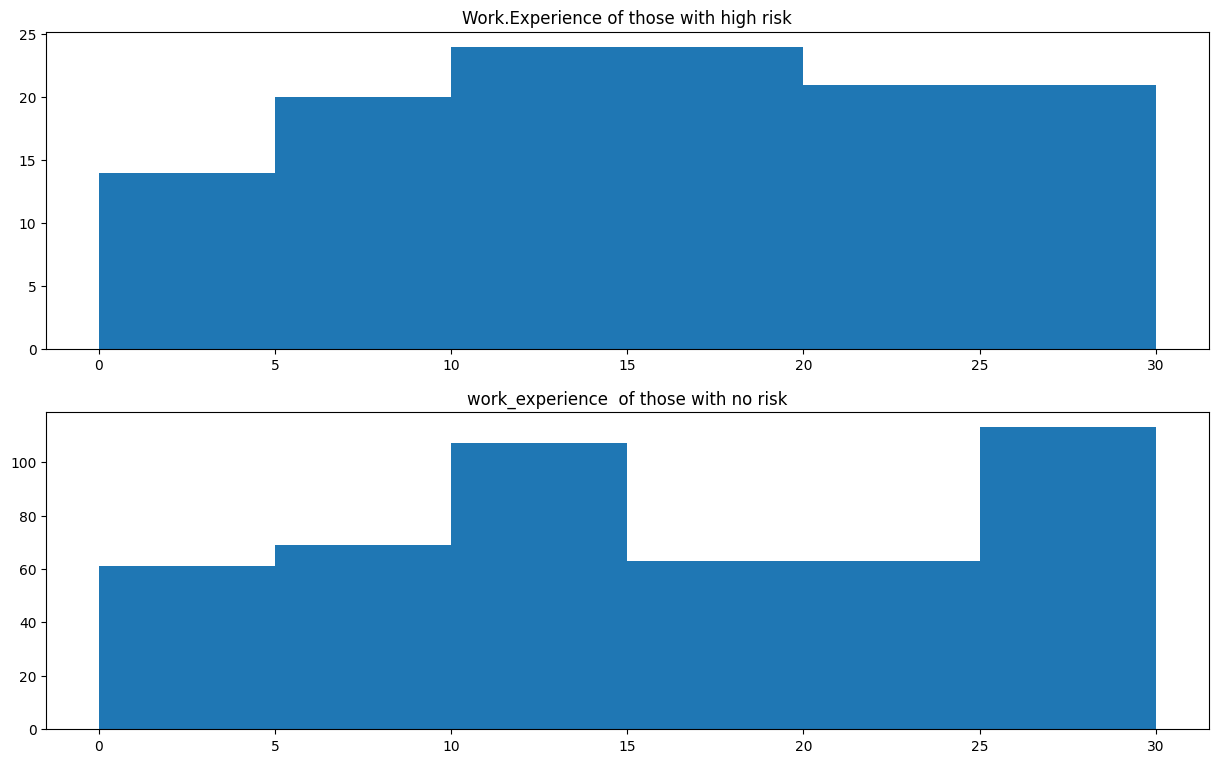

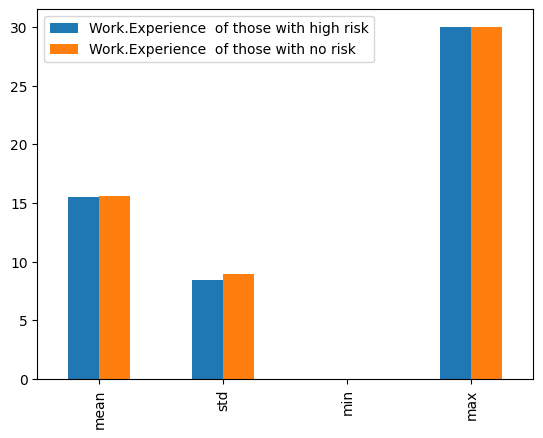

In [35]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['work_experience'], bins=range(min(fraud1['work_experience']), max(fraud1['work_experience']) + 5, 5))
plt.title('Work.Experience of those with high risk')

plt.subplot(3,1,2)
plt.hist(loan_asset_good['work_experience'],  bins=range(min(fraud1['work_experience']), max(fraud1['work_experience']) + 5, 5))
plt.title('work_experience  of those with no risk',)



exp_describe = pd.DataFrame()

exp_describe['Work.Experience  of those with high risk'] = loan_asset_risky['work_experience'].describe()
exp_describe['Work.Experience  of those with no risk'] = loan_asset_good['work_experience'].describe()
exp_describe = exp_describe.drop(['count', '25%', '50%', '75%'])

plt.subplot(3,1,2)
exp_describe.plot.bar()

plt.show()

undergrade w.r.t fraud

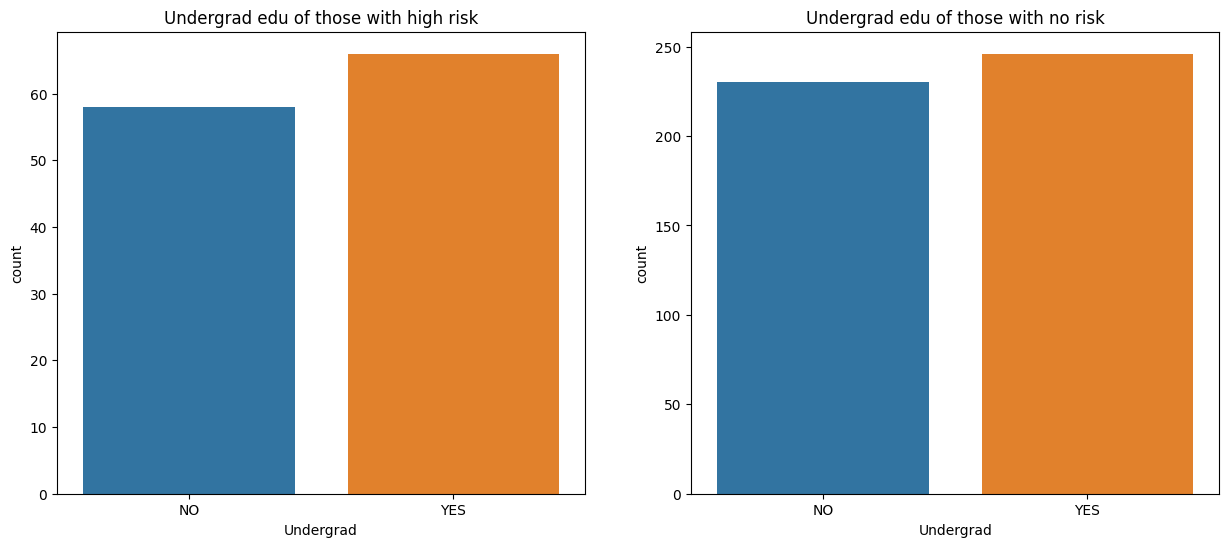

In [36]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data=loan_asset_risky,x='Undergrad')
plt.title('Undergrad edu of those with high risk')

plt.subplot(1,2,2)
sns.countplot(data=loan_asset_good,x='Undergrad')
plt.title('Undergrad edu of those with no risk')

plt.show()

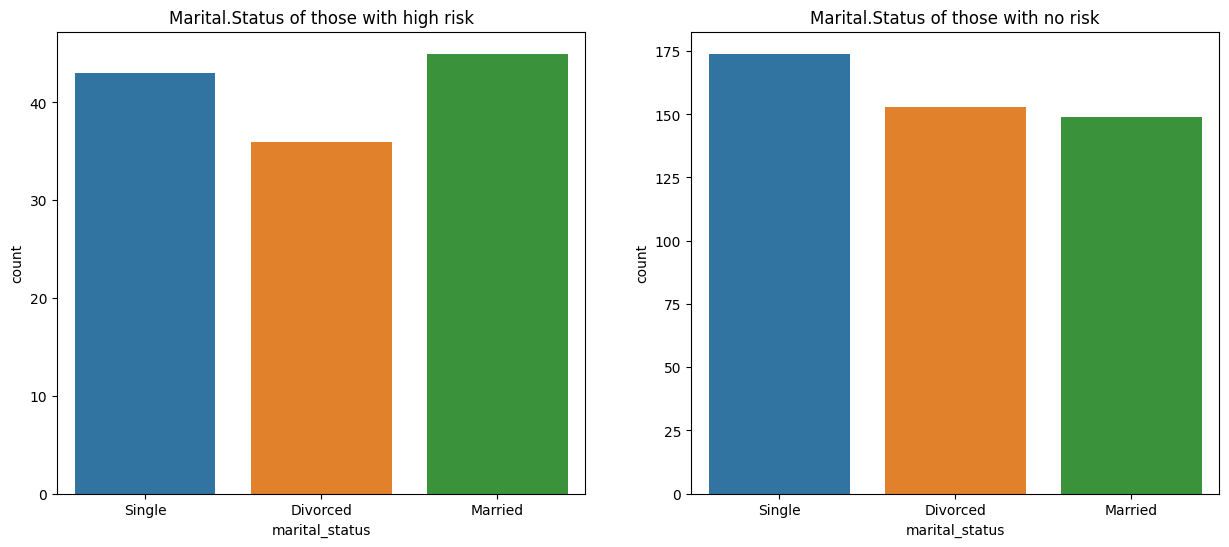

In [37]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="marital_status",data=loan_asset_risky)
plt.title('Marital.Status of those with high risk')

plt.subplot(1,2,2)
sns.countplot(x='marital_status',data=loan_asset_good)
plt.title('Marital.Status of those with no risk',)

plt.show()

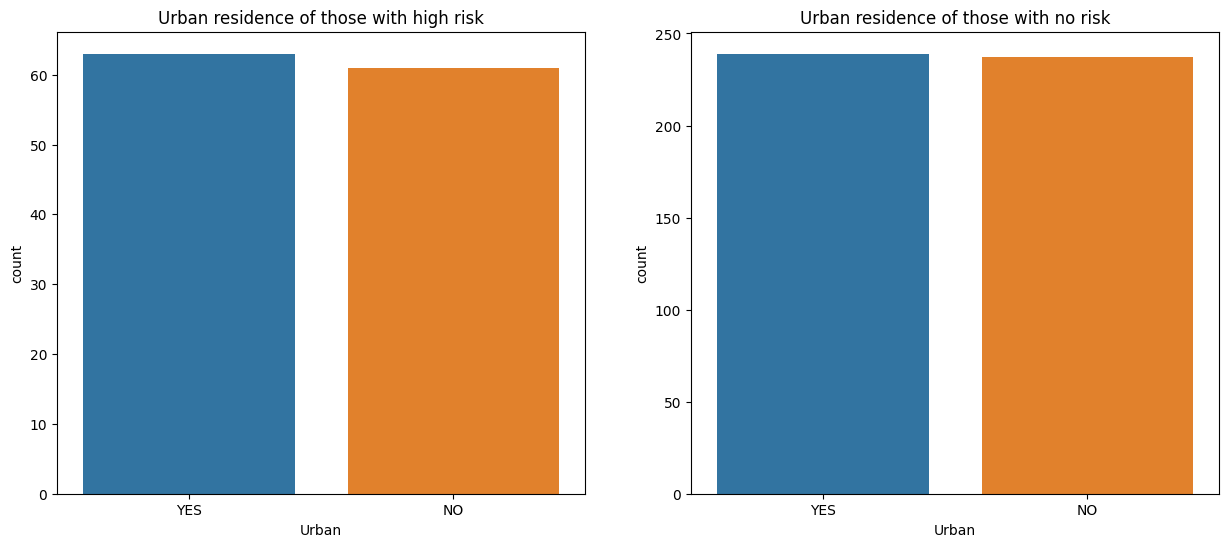

In [38]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data=loan_asset_risky,x='Urban')
plt.title('Urban residence of those with high risk')

plt.subplot(1,2,2)
sns.countplot(data=loan_asset_good,x='Urban')
plt.title('Urban residence of those with no risk',)

plt.show()

Data preprocessig

In [39]:
x=fraud1.iloc[:,:-1]
y=fraud1.iloc[:,-1]

In [40]:
x.head()

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [41]:
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: loan_type, dtype: object

In [42]:
x= pd.get_dummies(x)

In [43]:
x.head()

,taxable_income,city_population,work_experience,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [44]:
label= LabelEncoder()
y=label.fit_transform(y)

In [45]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [47]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(480, 10) (120, 10) (480,) (120,)


Building Decision Tree

In [48]:
#using entropy criteria
model = DecisionTreeClassifier(criterion="entropy",max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [49]:
pred= model.predict(x_test)

In [50]:
np.mean(pred==y_test)

1.0

In [51]:
confusion_matrix(y_test,pred)

array([[95,  0],
       [ 0, 25]])

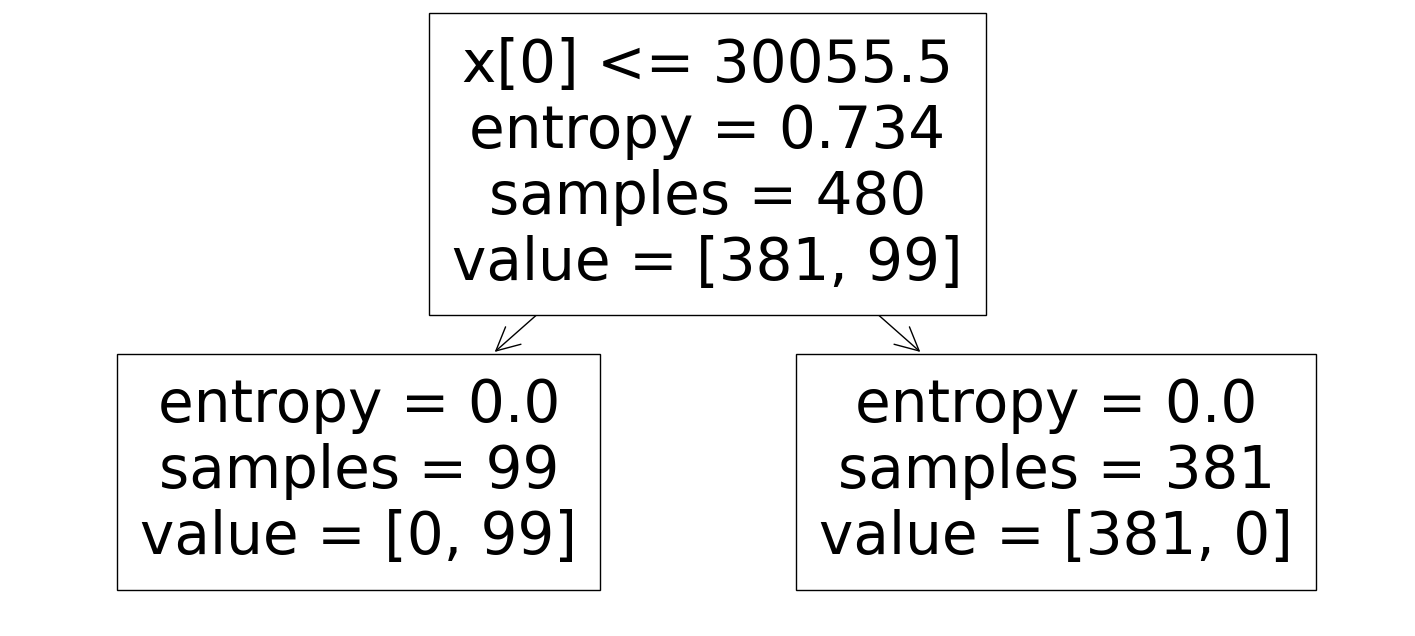

In [52]:
plt.figure(figsize=(18,8))
tree.plot_tree(model)
plt.show()

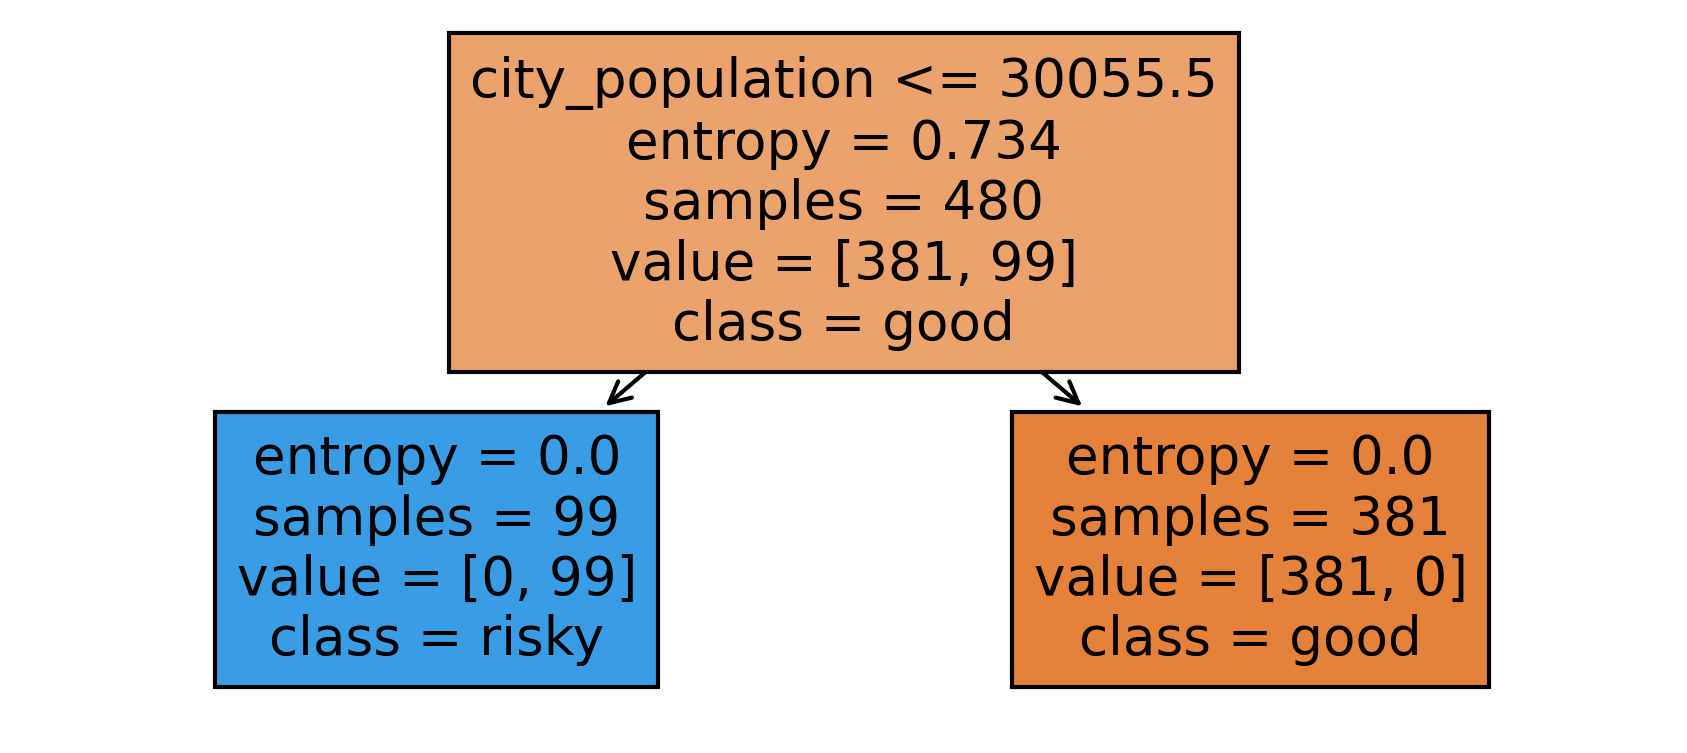

In [53]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

Using gini cretiria build the model

In [54]:
model= DecisionTreeClassifier(criterion="gini", max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [55]:
pred=model.predict(x_test)

In [56]:
accuracy_score(y_test,pred)

1.0

In [57]:
confusion_matrix(y_test,pred)

array([[95,  0],
       [ 0, 25]])

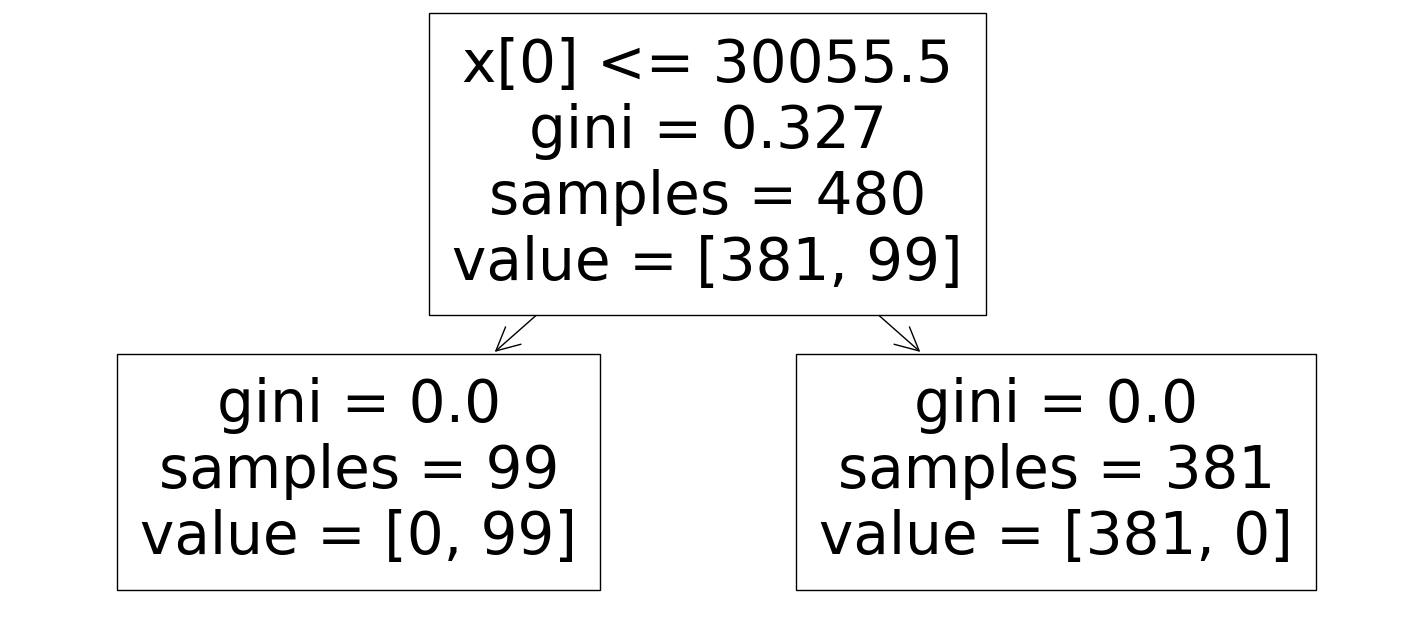

In [58]:
plt.figure(figsize=(18,8))
tree.plot_tree(model)
plt.show()

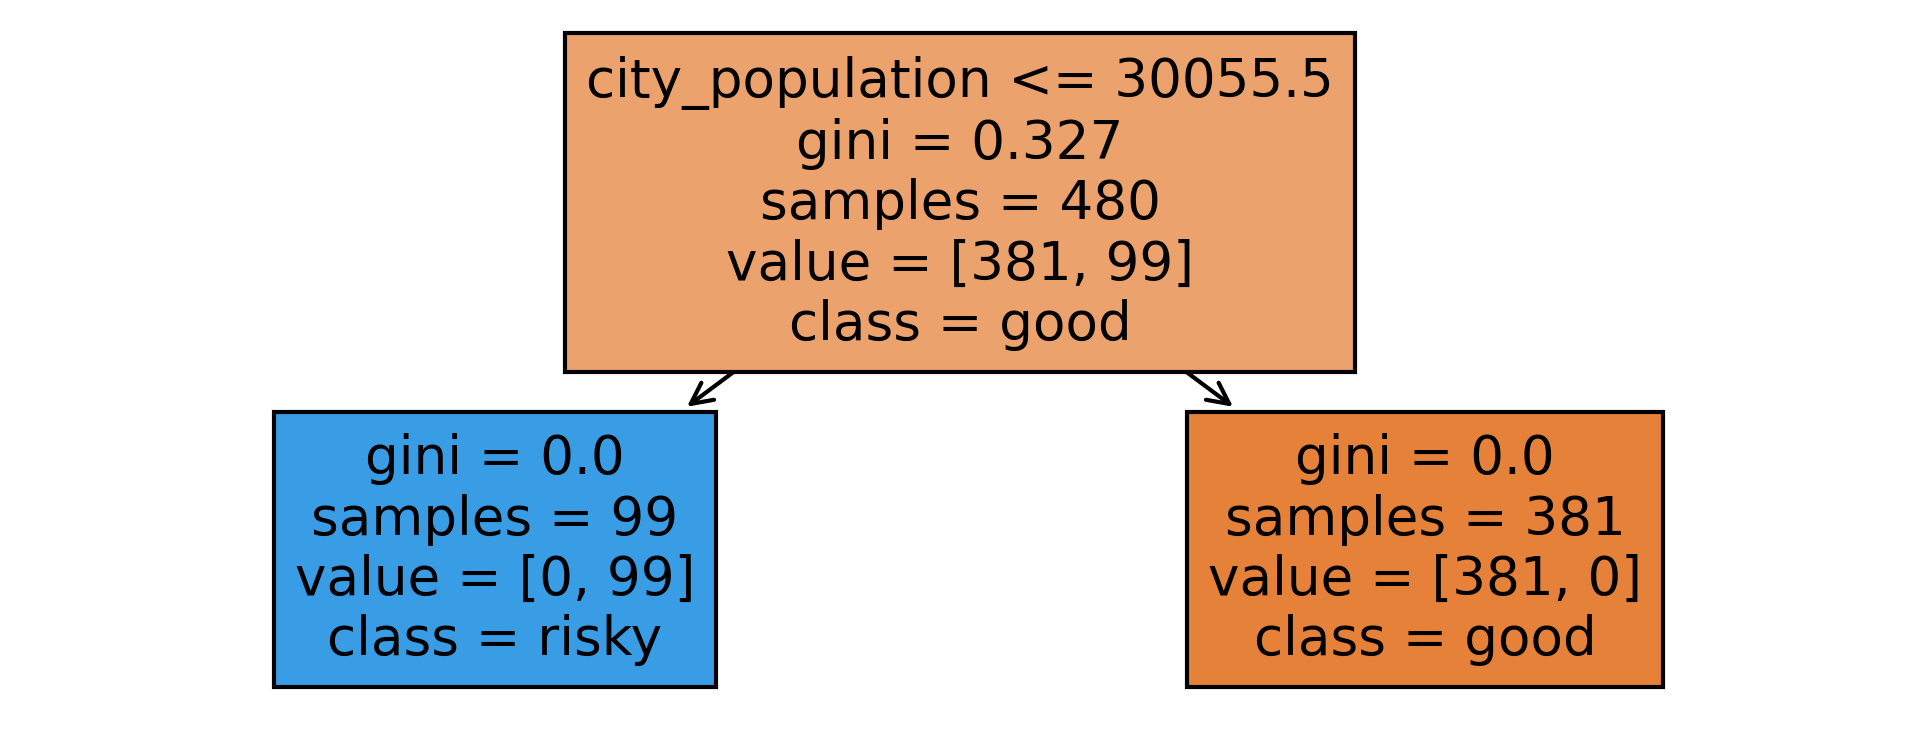

In [59]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

grid search for hyperparameter tuning

In [60]:
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [61]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

In [62]:
model=DecisionTreeClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_dict,cv=kfold)

In [63]:
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [64]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9983333333333334


building model using best hyperparameter

In [65]:
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [66]:
model_kf=grid.best_estimator_
model_kf.fit(x,y)

DecisionTreeClassifier(max_depth=1)

In [67]:
result=cross_val_score(model_kf,x,y,cv=kfold)
print(result.mean()*100)

99.83333333333334


In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        25

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



<Axes: >

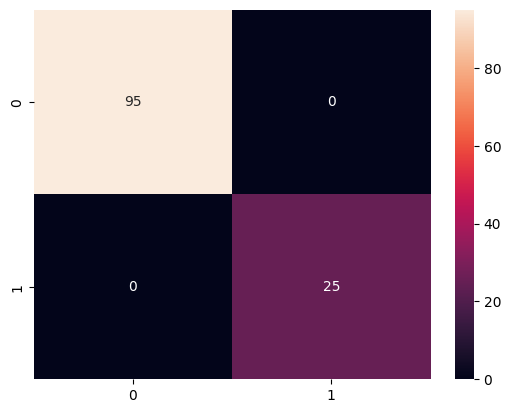

In [69]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

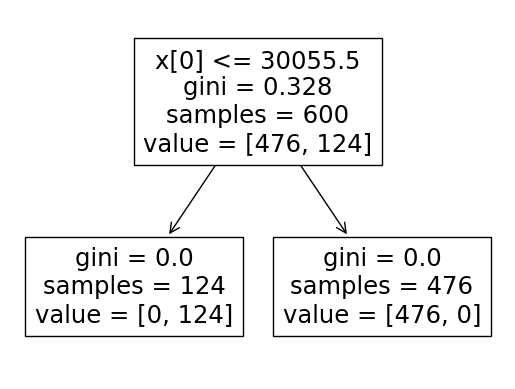

In [70]:
#PLot the decision tree
tree.plot_tree(model_kf)

plt.show()

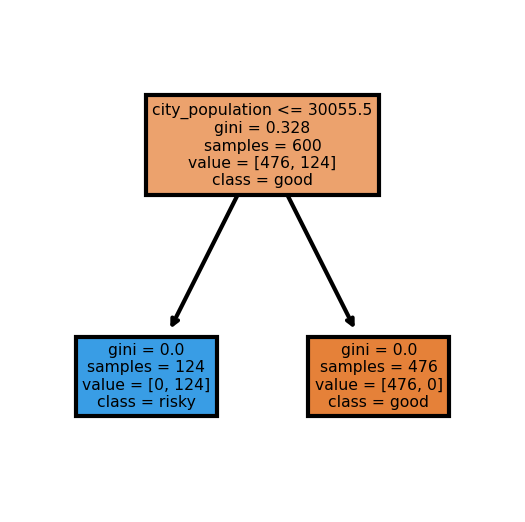

In [71]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model_kf,
               feature_names = fn,
               class_names=cn,
               filled = True);

#2

#Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing
from sklearn import tree

In [73]:
from sklearn.tree import  DecisionTreeClassifier

In [74]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [75]:
import warnings
warnings.filterwarnings("ignore")

In [76]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data (1).csv to Company_Data (1).csv


In [77]:
company = pd.read_csv("Company_Data (1).csv")

In [78]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [79]:
company.shape

(400, 11)

In [80]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [81]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [82]:
#categorical features
categorical_feature=[feature for feature in company.columns if company[feature].dtype=="O"]
print("categorical features:",categorical_feature)

categorical features: ['ShelveLoc', 'Urban', 'US']


In [83]:
#numerical features
numerical_features=[feature for feature in company.columns if company[feature].dtypes!="O"]
print("numerical feature:",numerical_features)

numerical feature: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [84]:
company['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [85]:
company["Urban"].unique()

array(['Yes', 'No'], dtype=object)

In [86]:
company["US"].unique()

array(['Yes', 'No'], dtype=object)

#feature engineering

Converting sales into categorical feature as we will make 3 categories in sales like low, medium and good sales

<Axes: xlabel='Sales', ylabel='Count'>

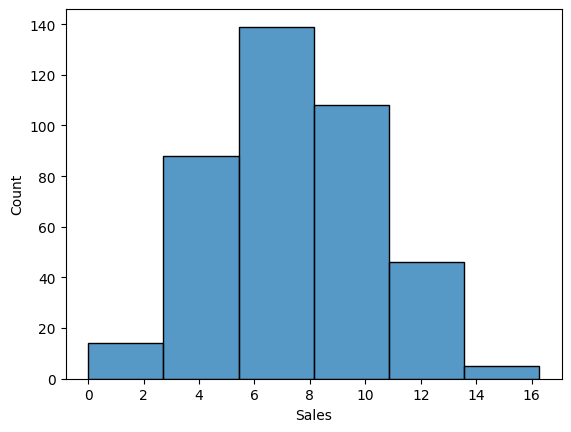

In [87]:
sns.histplot(x="Sales", data=company, bins=6)

In [88]:
company.Sales.max()

16.27

In [89]:
company.Sales.min()

0.0

In [90]:
company.Sales.max()/3

5.423333333333333

In [91]:
company1=company.copy()
company1["sub_category"]=pd.cut(x=company1.Sales,bins=[0,5.5,11,17],labels=["low","medium","high"],right=False)
company1.drop(["Sales"],axis=1,inplace=True)

In [92]:
company1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sub_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,medium
4,141,64,3,340,128,Bad,38,13,Yes,No,low


In [93]:
company1.sub_category.value_counts()

medium    248
low       103
high       49
Name: sub_category, dtype: int64

#Visualization

<Axes: xlabel='sub_category', ylabel='count'>

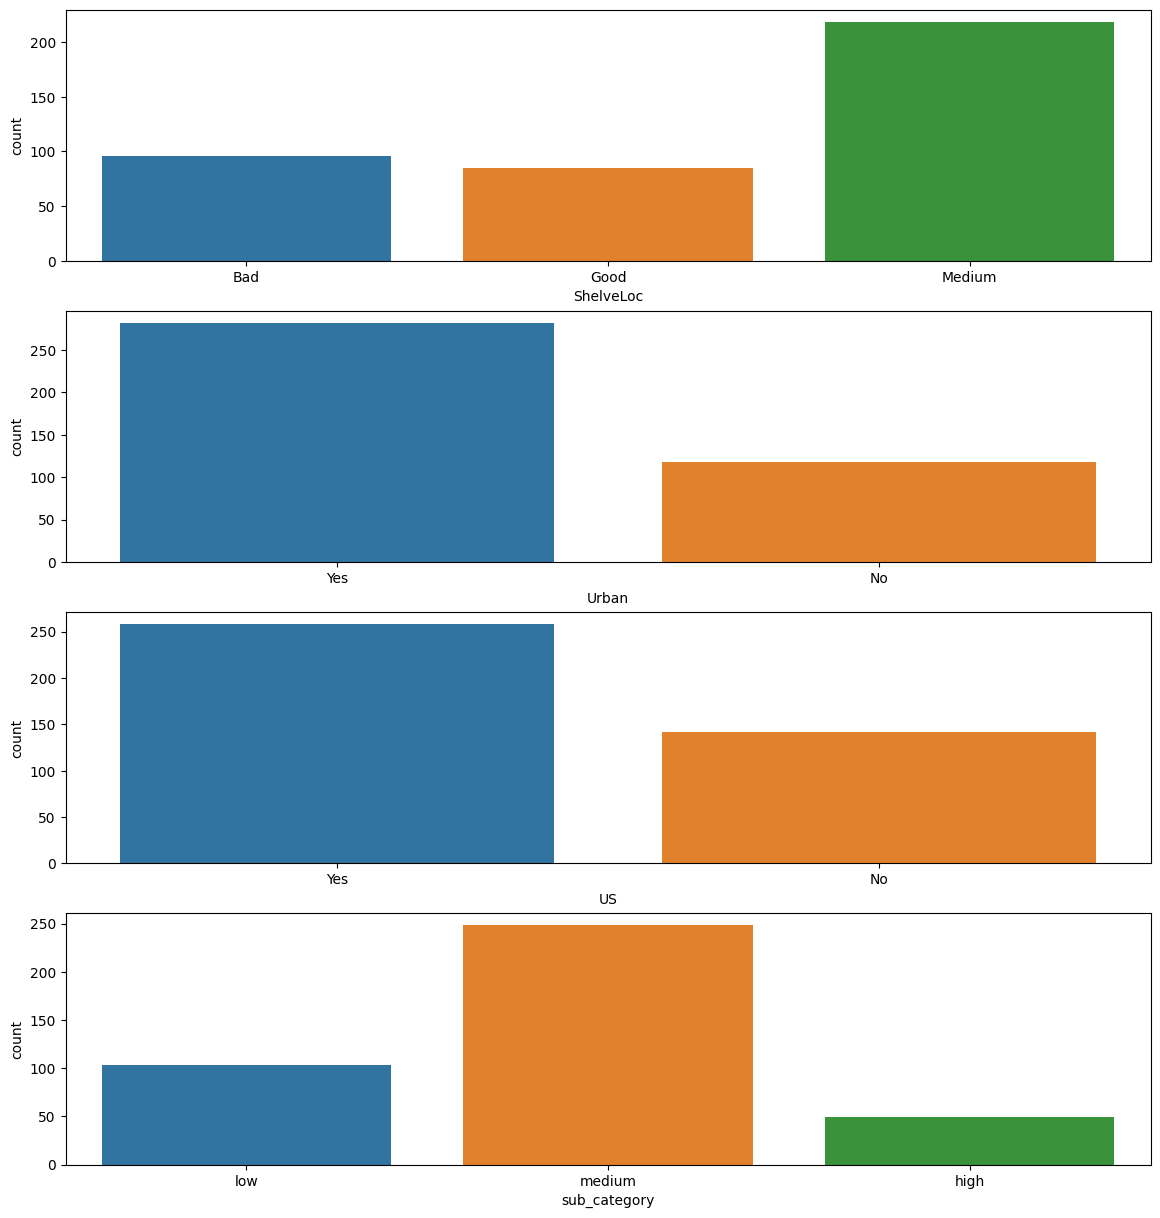

In [94]:
fig, ax=plt.subplots(4,1,figsize=(14,15))
sns.countplot(x="ShelveLoc",data=company1,ax=ax[0])
sns.countplot(x="Urban",data=company1,ax=ax[1])
sns.countplot(x="US",data=company1,ax=ax[2])

sns.countplot(x="sub_category",data=company1,ax=ax[3])

In [95]:
len(numerical_features)
print(numerical_features)

['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


<Axes: xlabel='Education', ylabel='Count'>

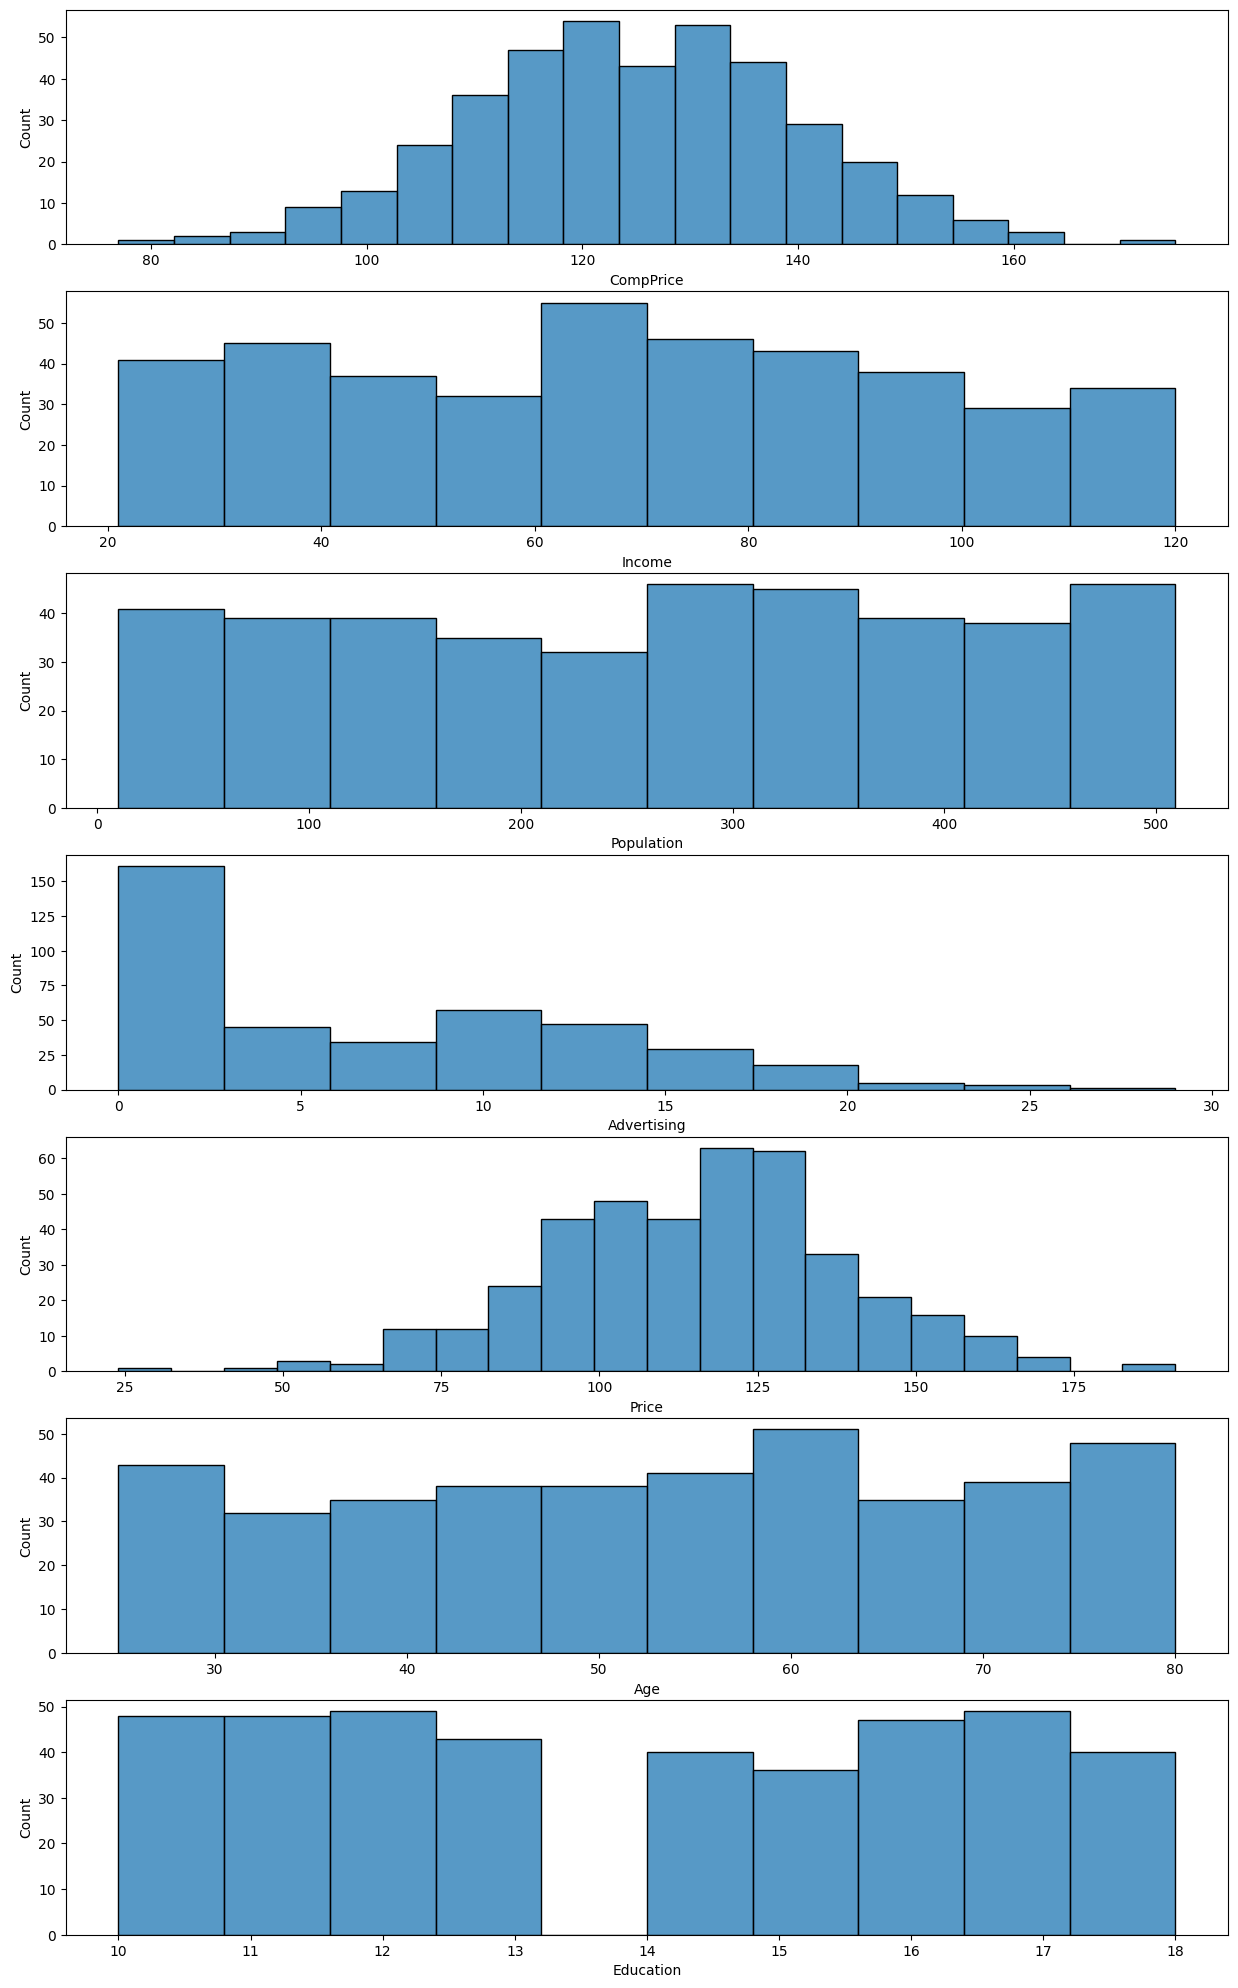

In [96]:
fig,ax=plt.subplots(7,1,figsize=(15,25))
sns.histplot(x="CompPrice",data=company1,ax=ax[0])
sns.histplot(x="Income",data=company1,ax=ax[1])
sns.histplot(x="Population",data=company1,ax=ax[2])
sns.histplot(x="Advertising",data=company1,ax=ax[3])
sns.histplot(x="Price",data=company1,ax=ax[4])

sns.histplot(x="Age",data=company1,ax=ax[5])
sns.histplot(x="Education",data=company1,ax=ax[6])

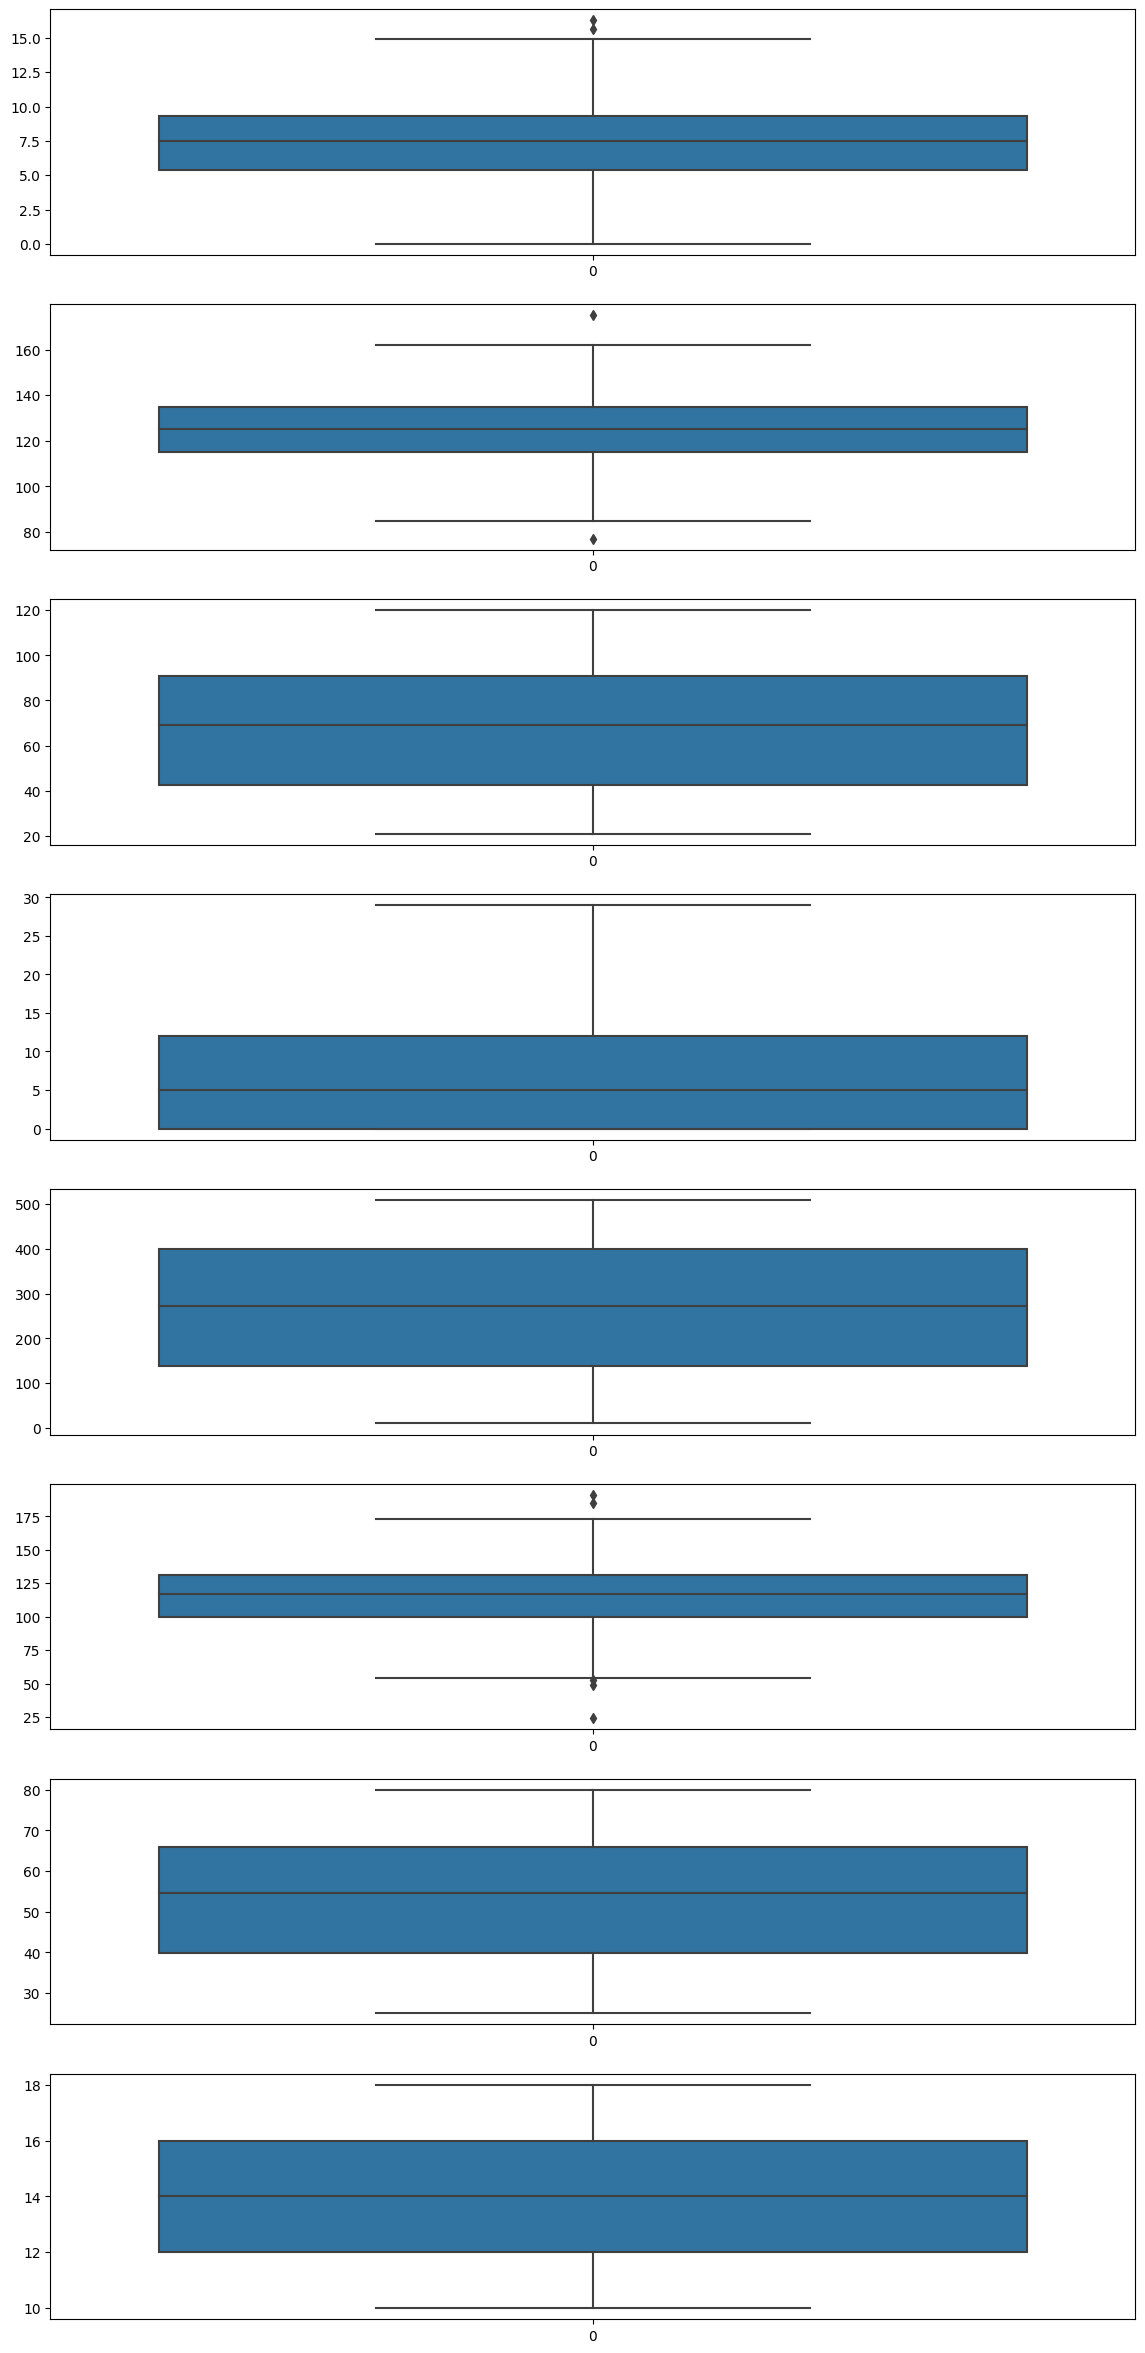

In [97]:
fig, axes=plt.subplots(len(numerical_features),1,figsize=(14,30))

for i in range (0, len(numerical_features)):
    sns.boxplot(company[numerical_features[i]],ax=axes[i])

In [98]:
company2 = company1.copy()

for feature in numerical_features:
    Q1,Q3 = np.percentile(company[feature], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    outliers = company[feature][(company[feature] < ll) |  (company[feature] > ul)]

    company2=company2.drop(outliers.index[:] , errors="ignore")

    outliers=0

In [99]:
print(company.shape)
print(company2.shape)

(400, 11)
(392, 11)


In [100]:
x=company2.drop(["sub_category"],axis=1)
y=company2["sub_category"]

In [101]:
x.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes


In [102]:
y.head(1)

0    medium
Name: sub_category, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [103]:
x= pd.get_dummies(x)

In [104]:
label= LabelEncoder()
y=label.fit_transform(y)

In [105]:
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [107]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0,test_size=0.25)

In [108]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(294, 14) (98, 14) (294,) (98,)


Feature selection

In [109]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [110]:
test=SelectKBest(score_func=chi2,k=4)
fit=test.fit(x,y)

In [111]:
scores= fit.scores_
features=fit.transform(x)

In [117]:
score_df = pd.DataFrame(zip(scores, x.columns),
                        columns=["Score","Feature"])
score_df.sort_values(by="Score",ascending=False, inplace=True)
score_df

,Score,Feature
4,193.077575,Price
2,131.019973,Advertising
5,93.806019,Age
8,69.563239,ShelveLoc_Good
1,63.584603,Income
7,47.066783,ShelveLoc_Bad
3,32.699398,Population
9,12.340114,ShelveLoc_Medium
12,6.672444,US_No
0,4.655268,CompPrice


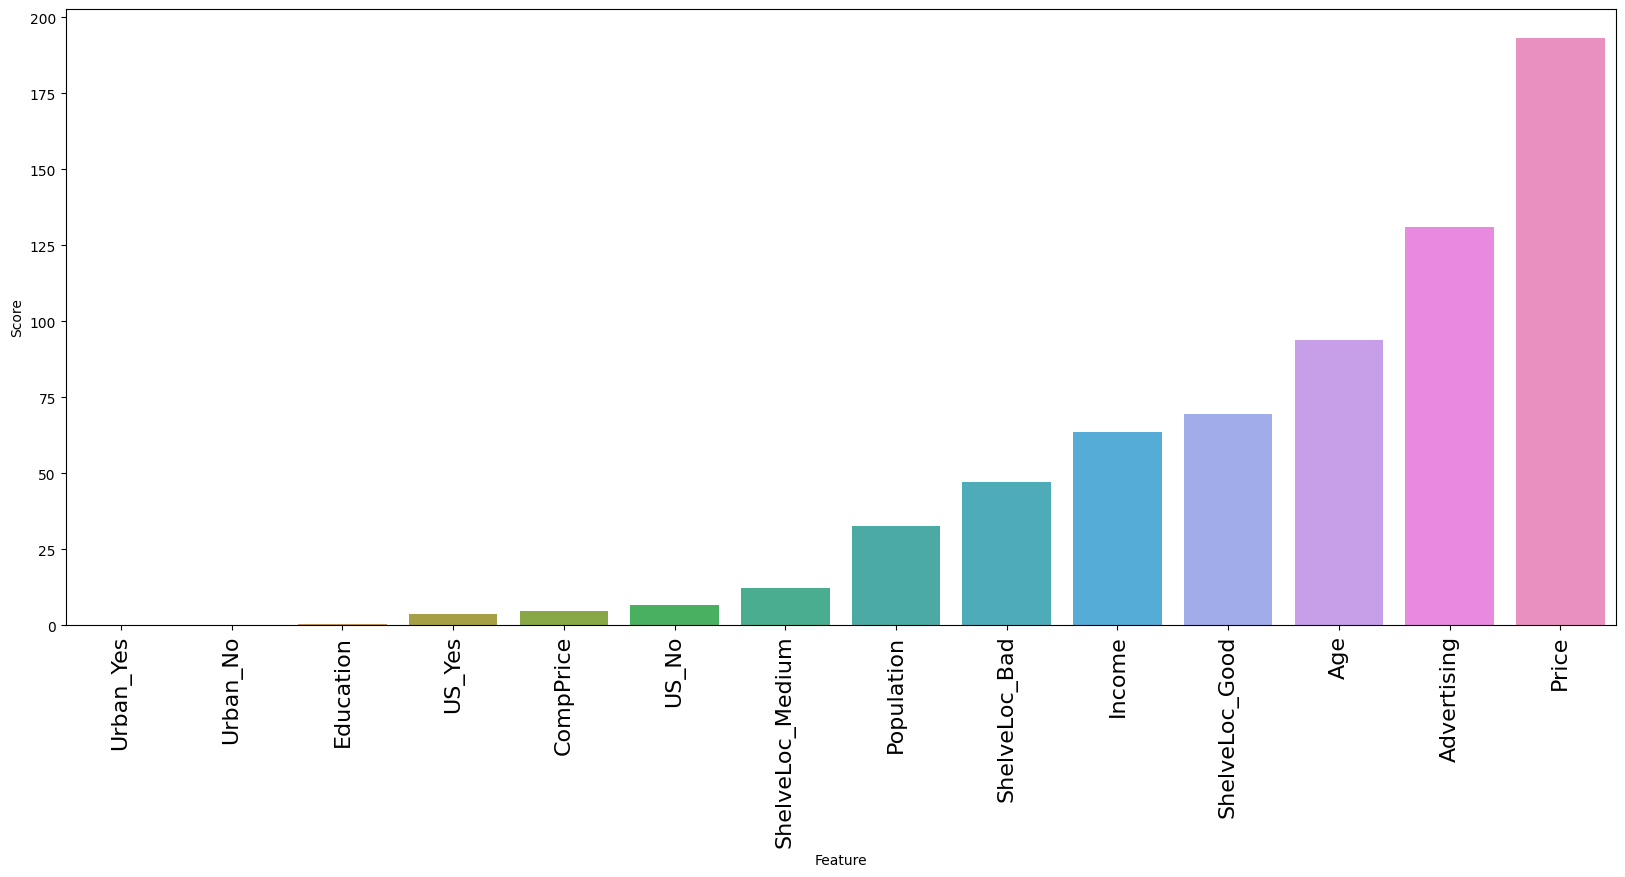

In [118]:
plt.figure(figsize=(20,8))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.xticks(rotation = 90, fontsize = 16)
plt.show()

In [119]:
model_data_x = x[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad',
                  'ShelveLoc_Medium', 'US_No','CompPrice']]

In [120]:
model_data_x

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,US_No,CompPrice
0,120,11,276,73,42,0,1,0,0,138
1,83,16,260,48,65,1,0,0,0,111
2,80,10,269,35,59,0,0,1,0,113
3,97,4,466,100,55,0,0,1,0,117
4,128,3,340,64,38,0,1,0,1,141
...,...,...,...,...,...,...,...,...,...,...
395,128,17,203,108,33,1,0,0,0,138
396,120,3,37,23,55,0,0,1,0,139
397,159,12,368,26,40,0,0,1,0,162
398,95,7,284,79,50,0,1,0,0,100


In [121]:
model_data_y = y
model_data_y

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0,

In [122]:
x_train, x_test,y_train,y_test = train_test_split(model_data_x, model_data_y, test_size=0.2,random_state=40)

#Building Decision Tree

Using entropy criteria

In [123]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [124]:
#predicting on test data
pred= model.predict(x_test)
pred

array([0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2])

In [125]:
cross= pd.crosstab(y_test,pred)
cross

col_0,0,1,2
row_0,,,
0,1,0,7
1,0,6,13
2,4,5,43


In [126]:
#accuracy
accuracy_score(y_test, pred)

0.6329113924050633

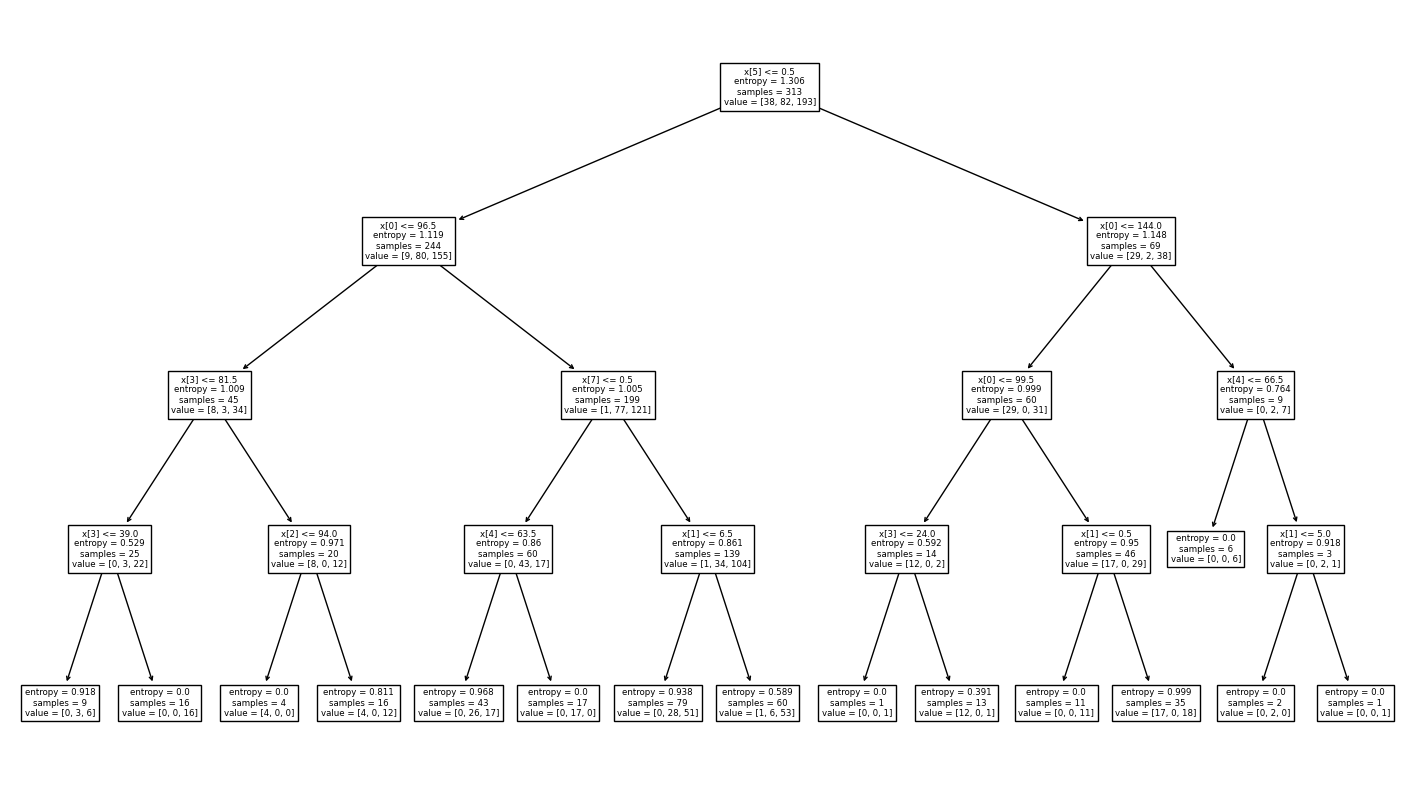

In [127]:
plt.figure(figsize=(18,10))
tree.plot_tree(model)
plt.show()

model building using gini impurity

In [128]:
model = DecisionTreeClassifier(criterion="gini", max_depth=4)

In [129]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [130]:
pred=model.predict(x_test)

In [131]:
accuracy_score(y_test,pred)

0.6329113924050633

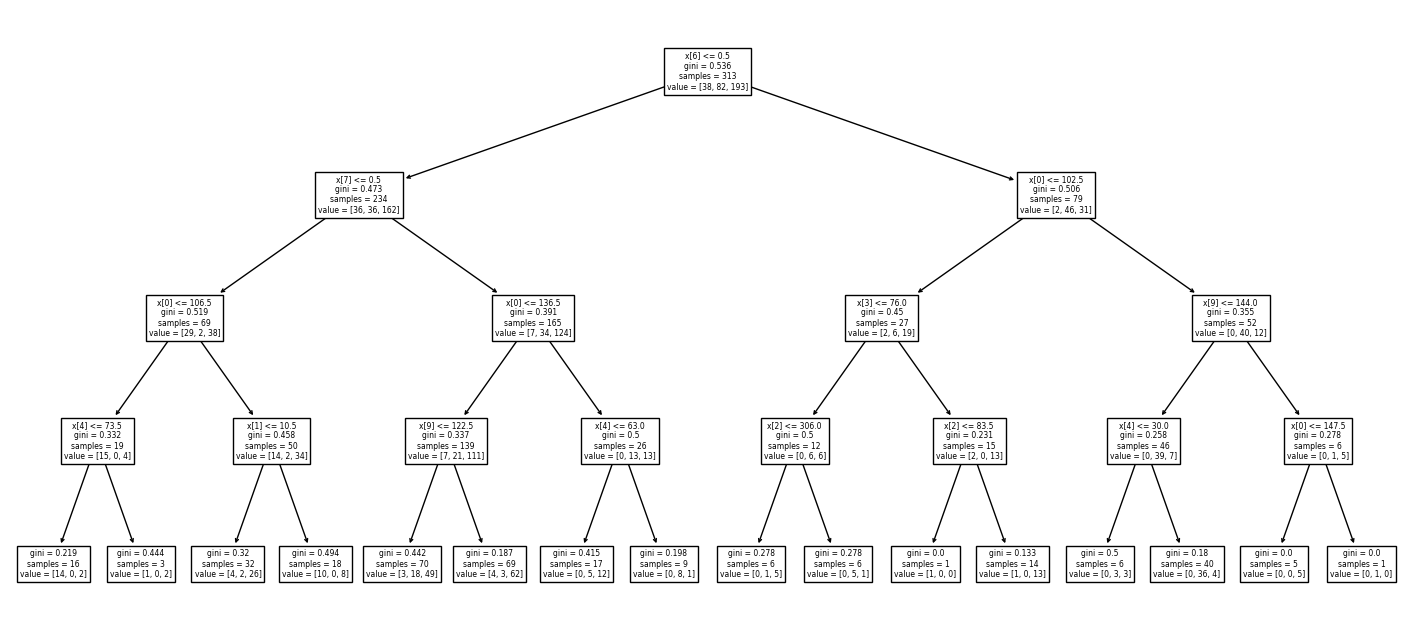

In [132]:
plt.figure(figsize=(18,8))
tree.plot_tree(model)
plt.show()

Gridsearchcv for hyperparameter tuning

In [133]:
kfold=KFold(n_splits=10,shuffle=True, random_state=0)

In [134]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

In [135]:
model=DecisionTreeClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_dict,cv=kfold)
grid.fit(model_data_x,model_data_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [136]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}
0.714102564102564


building model by using grid search best parameter

In [137]:
model_kf =grid.best_estimator_
model_kf.fit(model_data_x, model_data_y)

results = cross_val_score(model_kf, model_data_x, model_data_y, cv=kfold)
print('Accuracy with k fold validation is', np.round(results.mean(),3))

Accuracy with k fold validation is 0.709


In [138]:
model = grid.best_estimator_

pred=model.predict(x_test)
print('Accuracy with train test split:', accuracy_score(y_test, pred))

Accuracy with train test split: 0.6835443037974683


In [139]:
model

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)

In [140]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.60      0.32      0.41        19
           2       0.71      0.88      0.79        52

    accuracy                           0.68        79
   macro avg       0.60      0.48      0.51        79
weighted avg       0.66      0.68      0.65        79



<Axes: >

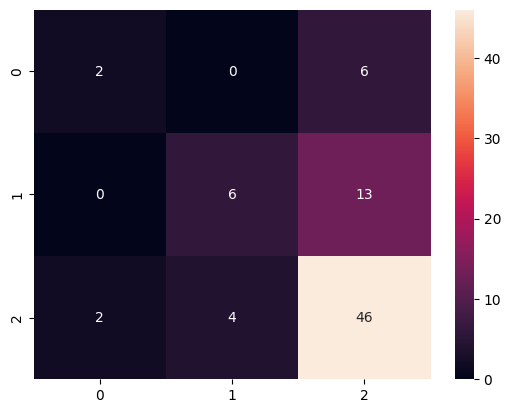

In [141]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

Plot the decision tree

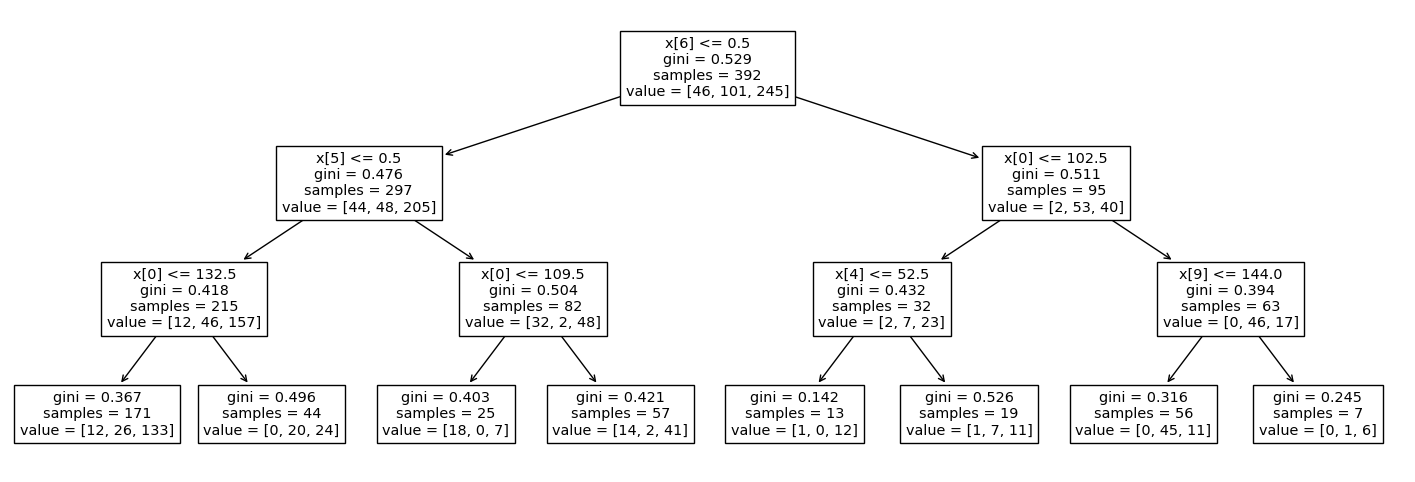

In [142]:
plt.figure(figsize=(18,6))
tree.plot_tree(model)
plt.show()

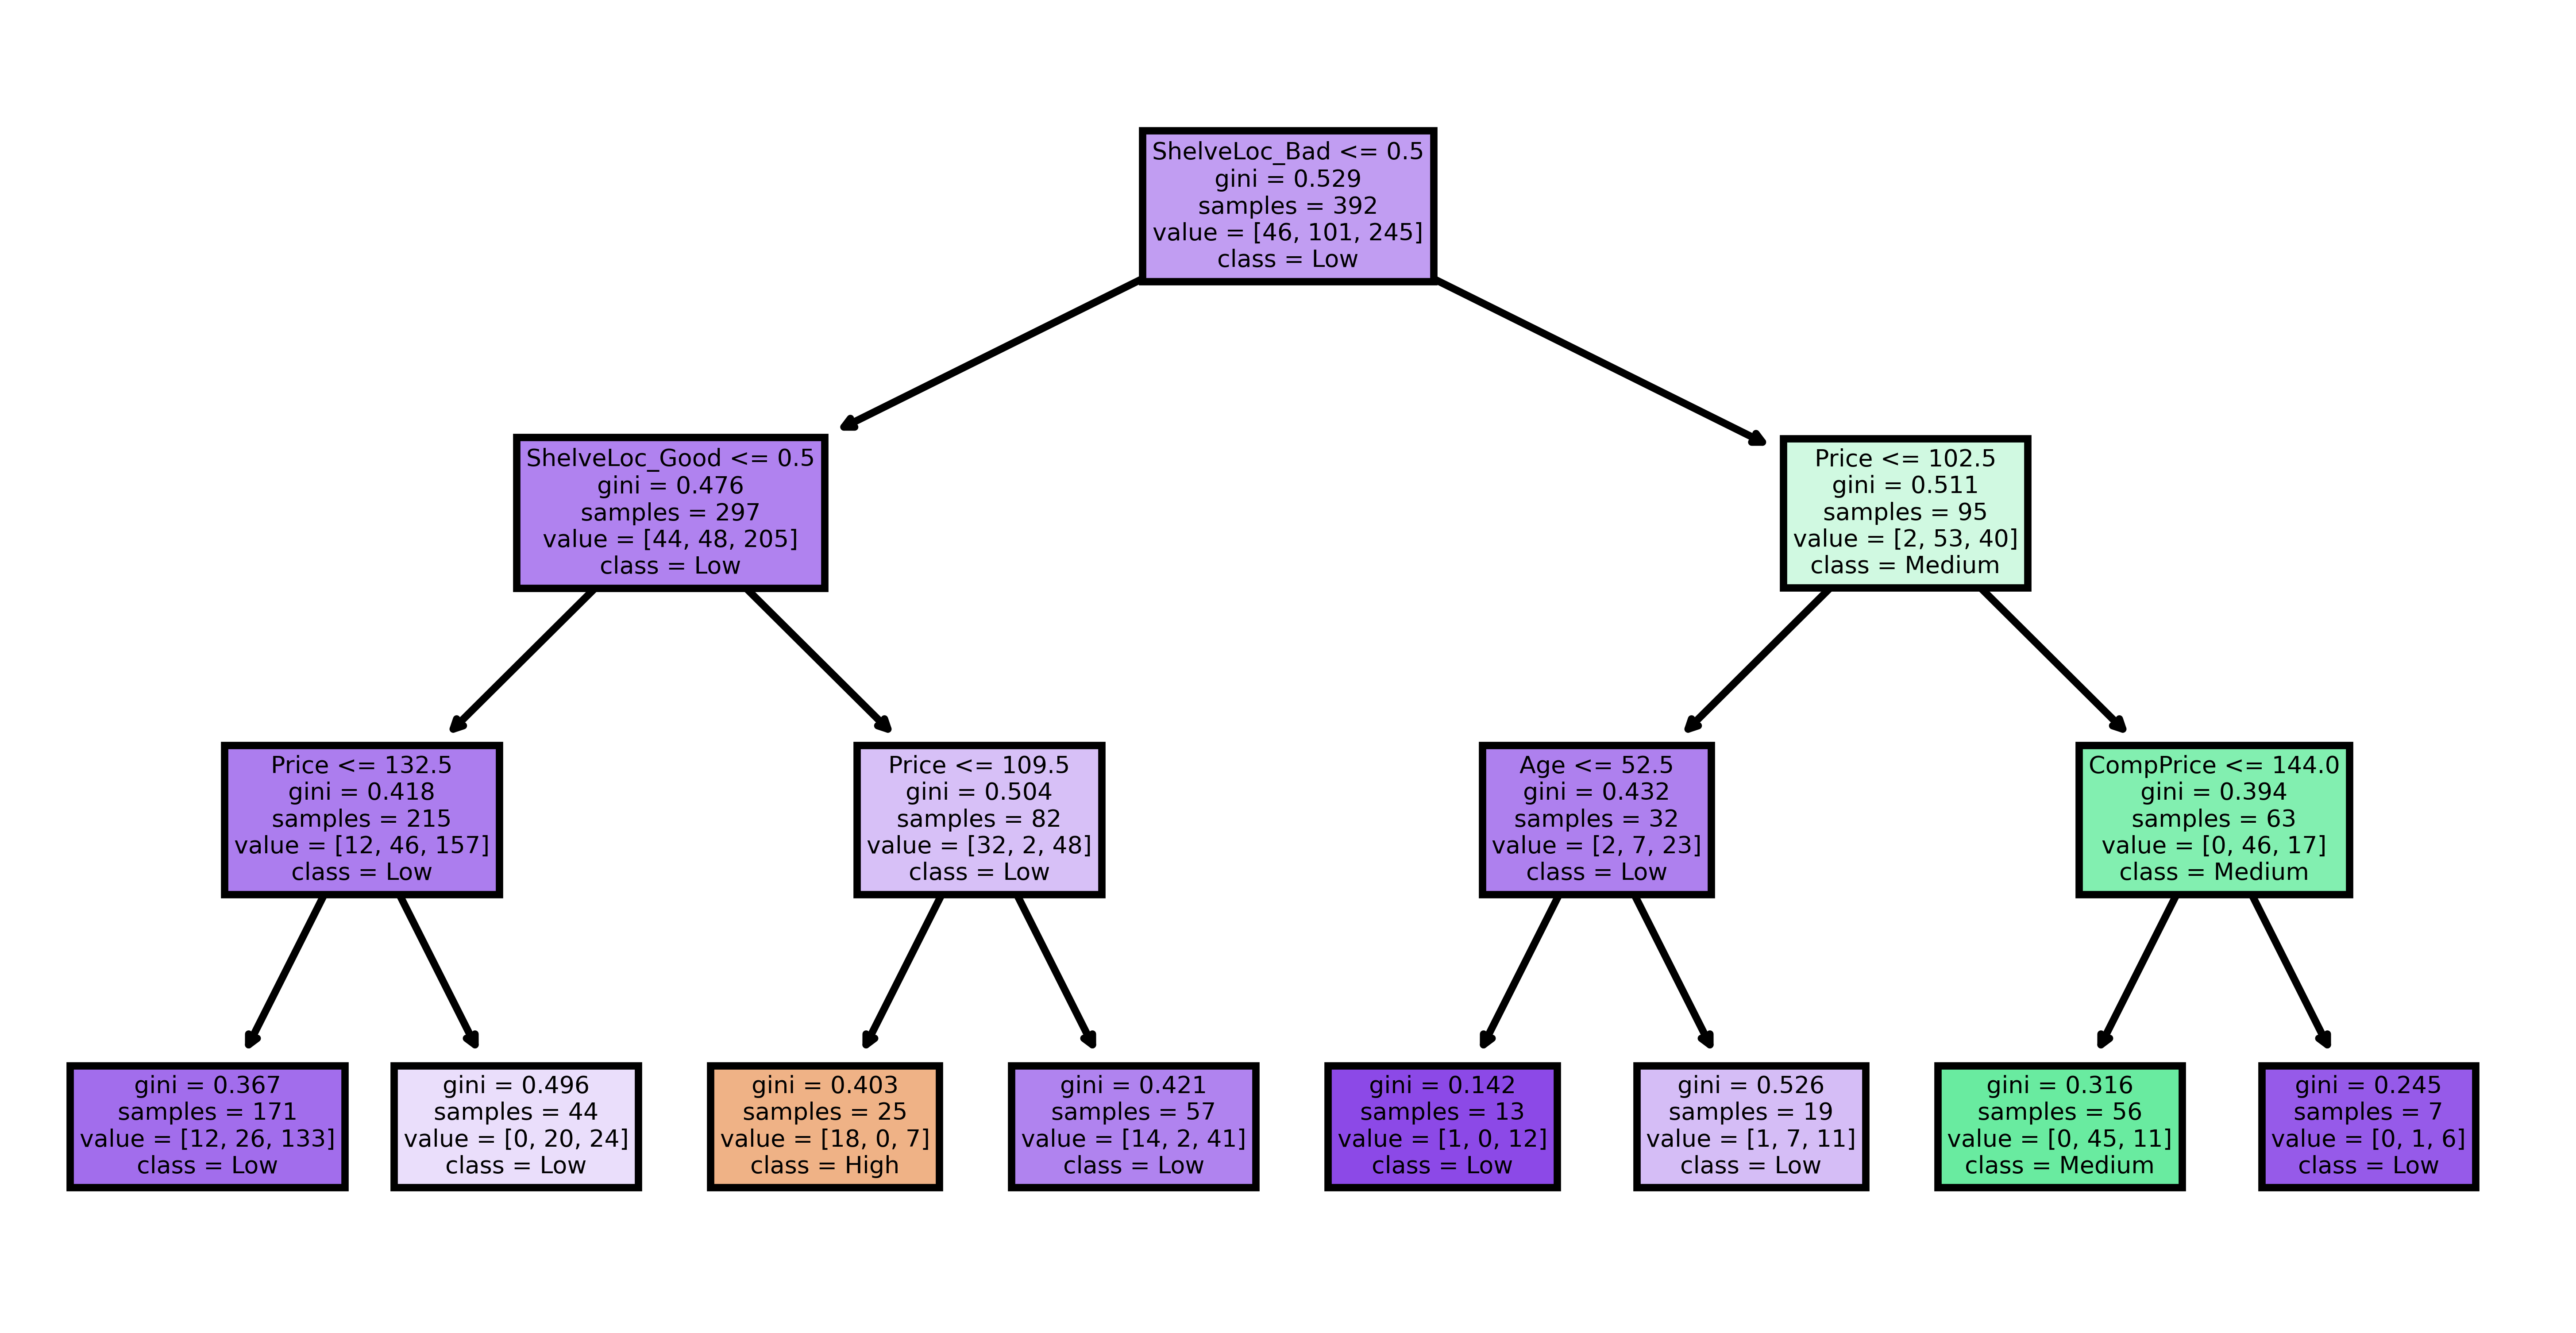

In [143]:
fn=['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad','ShelveLoc_Medium','US_No','CompPrice']
cn=['High', 'Medium', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,3), dpi=1200)
tree.plot_tree(model_kf,
               feature_names = fn,
               class_names=cn,
               filled = True);
plt.savefig('tree.png',format='png',bbox_inches = "tight")